# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

%matplotlib inline

### Read in our data

In [2]:
master_18_ft = pd.read_csv('./data/MASTER_2018_audio_features')

bb_18_ft = pd.read_csv('./data/REVAMPED_2018_billboard_features')

sf_18_ft = pd.read_csv('./data/REVAMPED_2018_songfacts_features')

master_13_ft = pd.read_csv('./data/MASTER_2013_audio_features')

bb_13_ft = pd.read_csv('./data/REVAMPED_2013_billboard_features')

sf_13_ft = pd.read_csv('./data/REVAMPED_2013_songfacts_features')

master_08_ft = pd.read_csv('./data/MASTER_2008_audio_features')

bb_08_ft = pd.read_csv('./data/REVAMPED_2008_billboard_features')

sf_08_ft = pd.read_csv('./data/REVAMPED_2008_songfacts_features')

master_18_lyr = pd.read_csv('./data/MASTER_2018_lyrics')

master_13_lyr = pd.read_csv('./data/MASTER_2013_lyrics')

master_08_lyr = pd.read_csv('./data/MASTER_2008_lyrics')

### Data Dictionary

|Key|Value Type|Value Description|
|---|---|---|
|danceability|float|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|energy|float|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|key|int|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.|
|loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.|
|mode|int|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness|float|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness|float|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|liveness|float|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|
|tempo|float|The overall estimated tempo of a track in beats per minute (BPM).|
|duration_sec|float|The duration of the track in seconds.|
|time_signature|int|An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).|
|hit|int|1 if a song is a hit (popular) song and 0 if not.|

|---|---|---|
|---|---|---|

In [3]:
# Create a function to perform preliminary cleaning of dataframe
def eda(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)        # Drop 'Unnamed: 0' column
    print(df.shape)                                    # Print shape of dataframe
    print(df.isna().sum().sum())                       # Print total number or null values in dataframe

In [4]:
# Create a function to create subplots to compare histograms of 3 dataframes and a given column name
def histograms(df1, df2, df3, column):
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,8));         # Initiate subplots
    
    ax[0].hist(df1[column], color='navy', bins=20);                                # First histogram
    ax[0].set_title('{} {}'.format("2018 song's", column), fontsize=18)            # Title for first histogram
    
    ax[1].hist(df2[column], color='pink', bins=20);                                # Second histogram
    ax[1].set_title('{} {}'.format("2013 song's", column), fontsize=18)            # Title for second histogram
    
    ax[2].hist(df3[column], color='darkred', bins=20);                             # Third histogram
    ax[2].set_title('{} {}'.format("2008 song's", column), fontsize=18)            # Title for third histogram

In [5]:
'''Create a function to create subplots containing one boxplot for each column in column list
Input is 1 dataframe and column list'''

# Column list
col_list = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
           'liveness', 'valence', 'duration_sec', 'key']

def plots(df, col_list):
    # For loop to iterate through each column in columns list
    for col in col_list: 
        # Create subplots
        fig, ax = plt.subplots(nrows=1)
        
        # Boxplot
        ax.boxplot(df[col])
        ax.set_title('{}'.format(col))

# 2018 Audio Features
### Billboard

In [6]:
eda(bb_18_ft)

(99, 15)
0


In [154]:
bb_18_ft.head()

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
0,God's Plan,0.754,0.449,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,7,4,198.973,1
1,Perfect,0.599,0.448,-6.312,1,0.0232,0.1630,0.000000,0.106,0.168,95.050,8,3,263.400,1
2,Meant to Be (feat. Florida Georgia Line),0.643,0.783,-6.458,1,0.0856,0.0470,0.000000,0.083,0.579,154.084,10,4,163.870,1
3,Havana,0.765,0.523,-4.333,1,0.0300,0.1840,0.000036,0.132,0.394,104.988,2,4,217.307,1
4,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,5,4,218.147,1


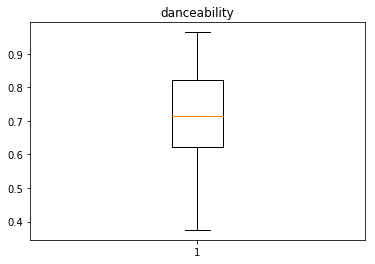

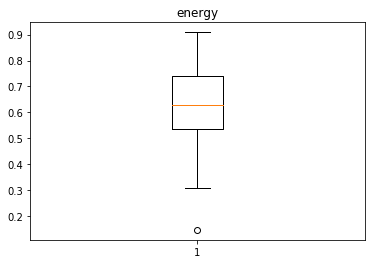

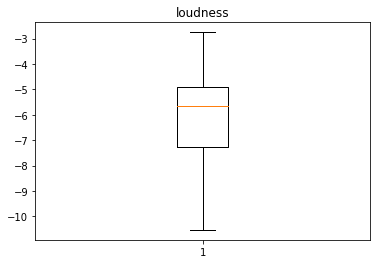

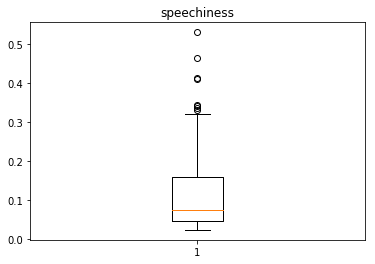

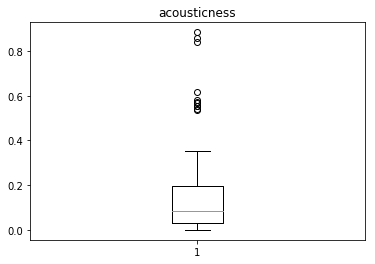

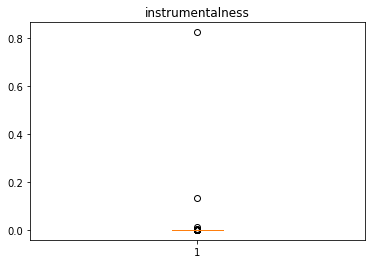

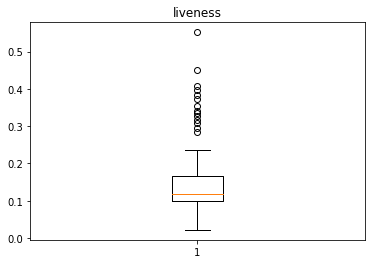

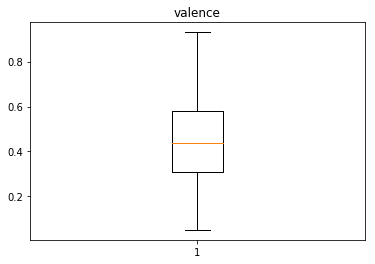

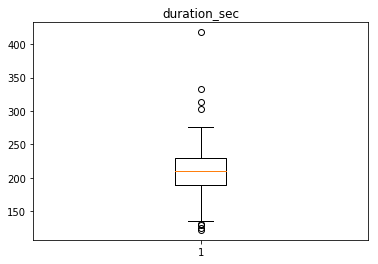

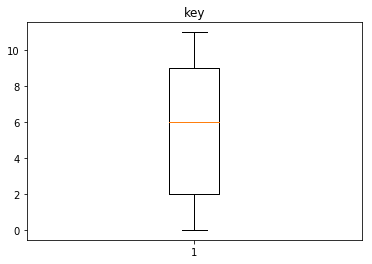

In [8]:
# Run plot function on data
plots(bb_18_ft, col_list)

In [144]:
# Danceability outlier
bb_18_ft[bb_18_ft['energy'] < 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
83,Say Something,0.407,0.147,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,2,3,229.4,1


In [146]:
# Instrumentalness outlier
bb_18_ft[bb_18_ft['instrumentalness'] > 0.8]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
52,Bodak Yellow (Money Moves) - Instrumental Version,0.736,0.762,-7.3,1,0.0468,0.171,0.825,0.219,0.91,125.014,9,4,218.581,1


In [147]:
# Acousticness outliers
bb_18_ft[bb_18_ft['acousticness'] > 0.8]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
83,Say Something,0.407,0.147,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,2,3,229.400,1
92,changes,0.669,0.308,-10.068,1,0.0290,0.883,0.000000,0.0984,0.5200,64.934,11,4,121.887,1
93,Mercy,0.638,0.367,-7.906,1,0.0266,0.840,0.000000,0.0999,0.2190,71.957,4,4,217.120,1


In [9]:
# Summary Statistics 
bb_18_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,99.0,0.718606,0.134678,0.375000,0.62250,0.7130,0.822500,0.964
energy,99.0,0.628838,0.147749,0.147000,0.53750,0.6280,0.741000,0.909
loudness,99.0,-6.010707,1.718453,-10.532000,-7.26500,-5.6650,-4.886000,-2.749
mode,99.0,0.646465,0.480500,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,99.0,0.121588,0.109024,0.023200,0.04530,0.0747,0.159000,0.530
acousticness,99.0,0.158584,0.196655,0.000874,0.03350,0.0862,0.195000,0.883
instrumentalness,99.0,0.009940,0.083849,0.000000,0.00000,0.0000,0.000016,0.825
liveness,99.0,0.152973,0.096769,0.021500,0.09995,0.1180,0.166000,0.552
valence,99.0,0.447252,0.210703,0.049900,0.30650,0.4370,0.581500,0.931
tempo,99.0,121.229131,29.978120,64.934000,95.51350,123.9940,142.106500,203.911


### Songfacts

In [138]:
# Run eda function on data
eda(sf_18_ft)

0

In [130]:
# Drop 'Unnamed: 0.1' column
sf_18_ft.drop('Unnamed: 0.1', axis=1, inplace=True)

In [131]:
'''
Checking all duplicates
Most duplicates have NaN as title
'''

sf_18_ft[sf_18_ft.iloc[:, 1:].duplicated(keep=False)][:10]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit


In [132]:
# Drop null values
sf_18_ft.dropna(inplace=True)

# Check shape after drop
sf_18_ft.shape

(1298, 15)

In [133]:
# Update CSV file with edits made
sf_18_ft.to_csv('./data/REVAMPED_2018_songfacts_features')

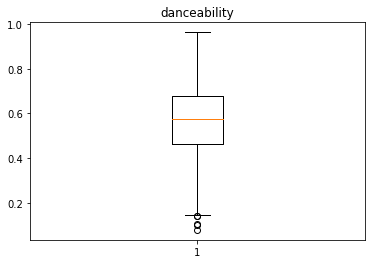

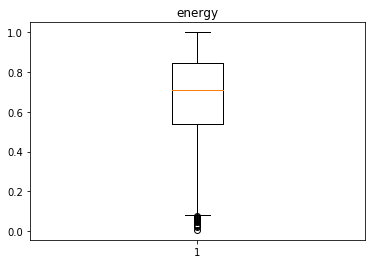

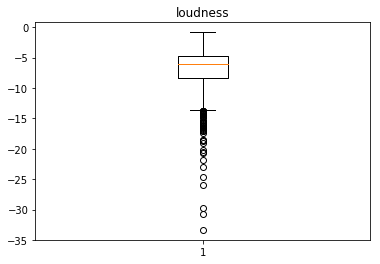

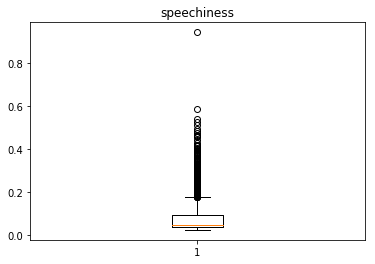

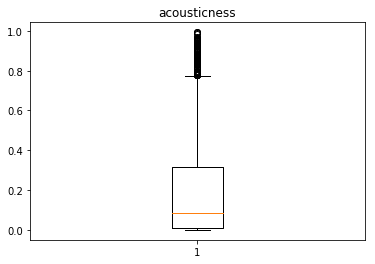

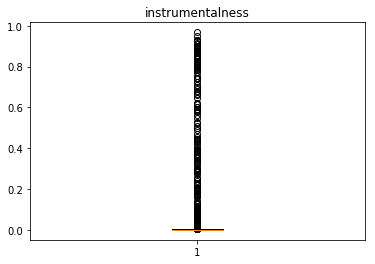

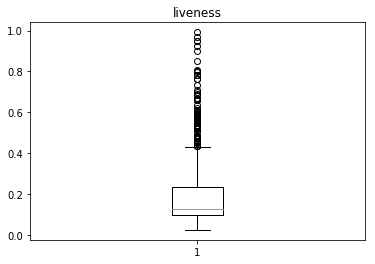

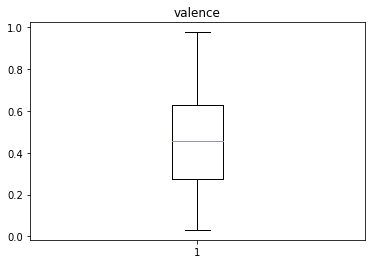

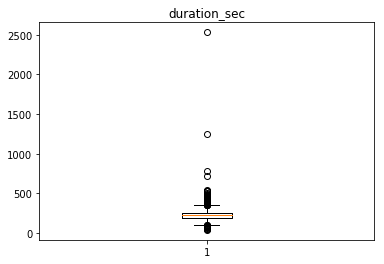

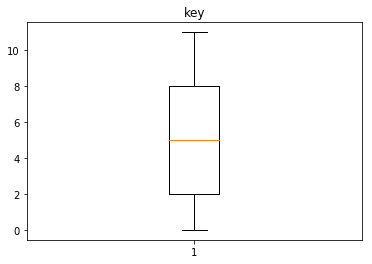

In [15]:
# Run plot function on data
plots(sf_18_ft, col_list)

In [139]:
# Danceability outliers
sf_18_ft[sf_18_ft['danceability'] < 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
5,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993000,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
32,Always There...In Our Hearts - Individual Shuf...,0.1740,0.91200,-4.763,1,0.0427,0.573000,0.003200,0.3660,0.0661,152.248,7,4,255.867,0
71,Through The Eyes Of A Child,0.1980,0.06490,-16.908,1,0.0385,0.810000,0.003790,0.0817,0.0402,77.814,0,4,274.413,0
189,Blood Like Cream,0.1410,0.93800,-6.452,1,0.0941,0.000005,0.202000,0.1950,0.2110,183.224,1,4,213.293,0
199,Blue Ocean Floor,0.1470,0.20400,-16.244,1,0.0515,0.786000,0.036800,0.1380,0.0781,180.856,2,4,439.467,0
235,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468000,0.896000,0.0851,0.0352,114.386,9,3,247.533,0
609,Fairweather Friends,0.1890,0.80000,-3.818,0,0.0931,0.011500,0.000108,0.8520,0.3220,187.788,11,4,223.387,0
628,O Father O Satan O Sun!,0.1590,0.92800,-4.116,1,0.0668,0.000404,0.000035,0.1510,0.1800,83.385,1,4,433.440,0
650,Finished Sympathy,0.1030,0.43600,-6.644,0,0.0402,0.019100,0.000050,0.0789,0.0391,179.893,7,4,502.493,0
689,Fragment 2,0.0784,0.12300,-13.846,1,0.0433,0.957000,0.929000,0.3100,0.0348,82.372,10,3,364.080,0


In [140]:
# Energy outliers
sf_18_ft[sf_18_ft['energy'] < 0.15]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
5,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
54,Another Year Has Gone By,0.5220,0.06790,-22.955,1,0.0426,0.991,0.929000,0.1070,0.1790,74.007,4,4,247.124,0
71,Through The Eyes Of A Child,0.1980,0.06490,-16.908,1,0.0385,0.810,0.003790,0.0817,0.0402,77.814,0,4,274.413,0
97,Back When We Were Beautiful,0.4690,0.06550,-13.057,1,0.0350,0.949,0.000010,0.1350,0.1840,77.426,2,4,220.080,0
98,Backwaters,0.6160,0.08190,-13.531,0,0.0740,0.924,0.844000,0.1110,0.2600,111.564,11,3,147.300,0
158,You and Me - Piano Version,0.4310,0.13800,-11.964,0,0.0465,0.896,0.000000,0.1240,0.2560,99.144,10,4,238.490,0
177,Blackbird - Remastered 2009,0.6860,0.12700,-14.361,1,0.0342,0.754,0.000014,0.0573,0.3720,93.699,7,4,138.387,0
198,Blue Crystal Glow,0.4630,0.13400,-12.637,1,0.0319,0.941,0.000000,0.2990,0.0673,99.143,7,5,122.336,0
235,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468,0.896000,0.0851,0.0352,114.386,9,3,247.533,0
291,Can’t Help Falling in Love,0.2660,0.05960,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,0,3,201.933,0


In [141]:
# Loudness outliers
sf_18_ft[sf_18_ft['loudness'] < -30]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
433,Speak to Me,0.592,0.0196,-33.350,1,0.0358,0.362,0.854,0.1080,0.0312,119.504,1,4,65.314,0
762,Do Not Go Gentle into That Good Night,0.404,0.0535,-30.703,1,0.1810,0.939,0.298,0.0475,0.0977,147.402,5,4,99.105,0


In [142]:
# Speechiness outlier
sf_18_ft[sf_18_ft['speechiness'] > 0.66]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
686,Hard Candy and Formaldehyde,0.62,0.435,-15.95,1,0.945,0.93,0.0,0.947,0.464,110.686,6,1,247.707,0


In [143]:
# Liveness outliers
sf_18_ft[sf_18_ft['liveness'] > 0.9]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
96,God's Great Dance Floor,0.564,0.830,-8.783,1,0.0316,0.000163,0.00497,0.926,0.523,128.007,10,4,234.280,0
218,Ghost (Live) - 8/5/17 Boston Cream,0.446,0.612,-9.990,0,0.0345,0.239000,0.61700,0.967,0.642,122.255,9,4,1245.520,0
305,Carry on Jon - Live,0.339,0.327,-17.100,0,0.0437,0.628000,0.89100,0.992,0.267,211.903,4,3,381.336,0
686,Hard Candy and Formaldehyde,0.620,0.435,-15.950,1,0.9450,0.930000,0.00000,0.947,0.464,110.686,6,1,247.707,0
1006,"I Like It, I Love It",0.643,0.961,-5.298,1,0.0315,0.019600,0.00000,0.948,0.960,124.027,0,4,205.707,0


In [134]:
# Summary Statistics
sf_18_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1298.0,0.569245,0.156776,0.078400,0.463000,0.574500,0.67700,0.964
energy,1298.0,0.673182,0.213632,0.007260,0.539000,0.710500,0.84375,0.999
loudness,1298.0,-6.890522,3.383269,-33.350000,-8.316250,-6.085000,-4.70250,-0.818
mode,1298.0,0.663328,0.472754,0.000000,0.000000,1.000000,1.00000,1.000
speechiness,1298.0,0.086013,0.091659,0.023500,0.034800,0.047900,0.09115,0.945
acousticness,1298.0,0.215592,0.273954,0.000003,0.009113,0.083300,0.31500,0.993
instrumentalness,1298.0,0.058931,0.180271,0.000000,0.000000,0.000009,0.00221,0.968
liveness,1298.0,0.183789,0.141879,0.023700,0.097875,0.126000,0.23175,0.992
valence,1298.0,0.461659,0.230668,0.031200,0.275250,0.455000,0.62800,0.976
tempo,1298.0,123.642629,29.882740,60.048000,99.184750,123.064000,142.67500,211.903


### Master

In [16]:
eda(master_18_ft)

(1397, 16)
0


In [124]:
master_18_ft.drop('Unnamed: 0.1', axis=1, inplace=True)

In [125]:
'''
Checking all duplicates
These duplicates are the same as the duplicates in the 2018 songfacts dataframe
'''

master_18_ft[master_18_ft.iloc[:, 1:].duplicated(keep=False)][:10]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit


In [126]:
# Drop null values
master_18_ft.dropna(inplace=True)

# Check shape after drop
master_18_ft.shape

(1397, 15)

In [127]:
# Update CSV file with edits made
master_18_ft.to_csv('./data/MASTER_2018_audio_features')

In [128]:
# Summary Statistics
master_18_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1397.0,0.579830,0.159935,0.078400,0.4700,0.585000,0.69000,0.964
energy,1397.0,0.670040,0.209915,0.007260,0.5380,0.705000,0.83600,0.999
loudness,1397.0,-6.828173,3.300465,-33.350000,-8.1910,-6.038000,-4.73700,-0.818
mode,1397.0,0.662133,0.473152,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,1397.0,0.088534,0.093399,0.023200,0.0351,0.049300,0.09430,0.945
acousticness,1397.0,0.211552,0.269550,0.000003,0.0106,0.083500,0.30200,0.993
instrumentalness,1397.0,0.055459,0.175627,0.000000,0.0000,0.000007,0.00138,0.968
liveness,1397.0,0.181605,0.139363,0.021500,0.0983,0.125000,0.22400,0.992
valence,1397.0,0.460638,0.229270,0.031200,0.2770,0.452000,0.62400,0.976
tempo,1397.0,123.471594,29.885166,60.048000,99.0210,123.069000,142.68400,211.903


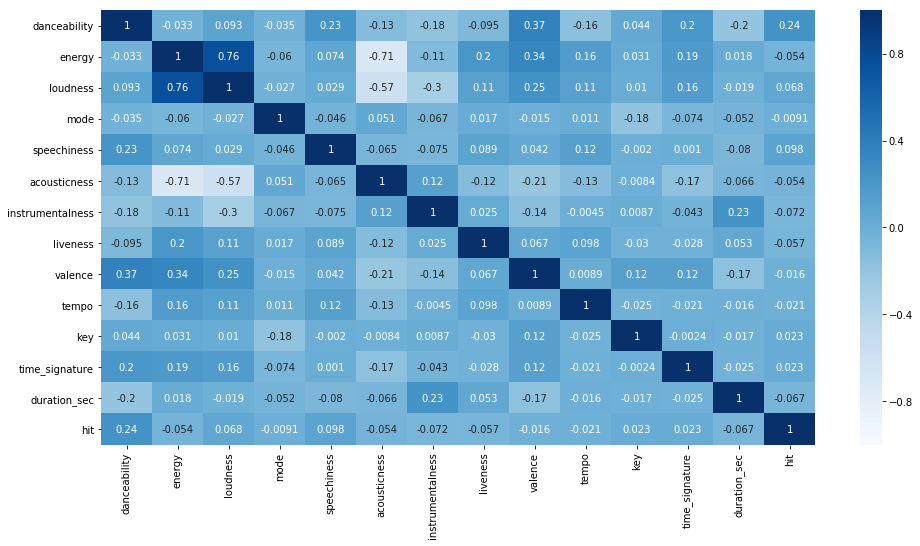

In [129]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(master_18_ft.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

# 2013 Audio Features
### Billboard

In [22]:
# Run eda function on data
eda(bb_13_ft)

(100, 15)
0


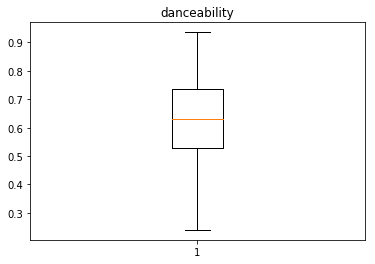

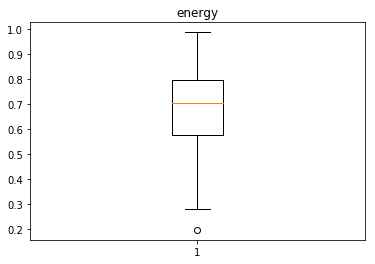

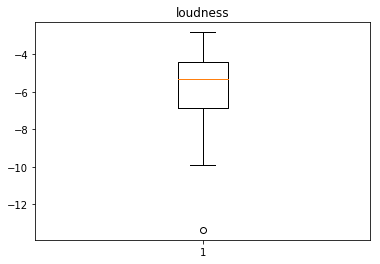

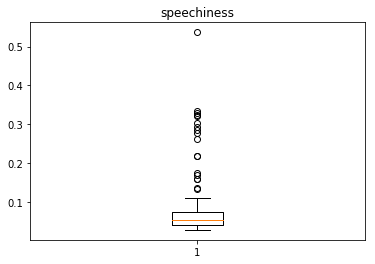

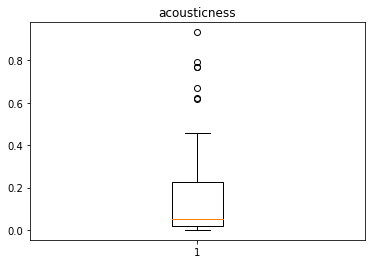

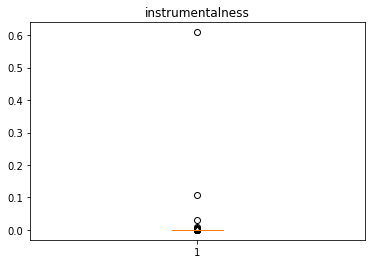

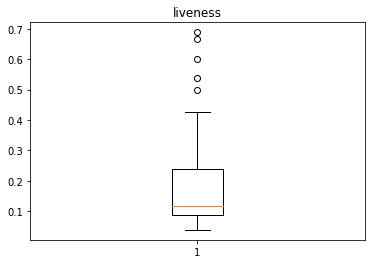

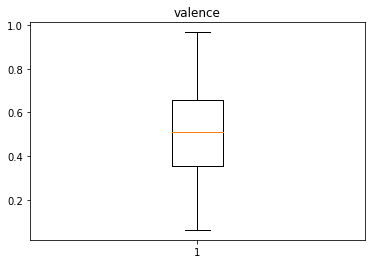

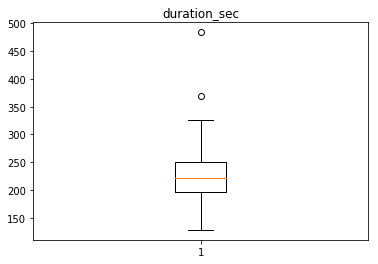

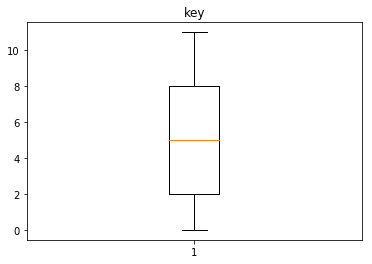

In [23]:
# Run plots function on data
plots(bb_13_ft, col_list)

In [116]:
# Energy outlier
bb_13_ft[bb_13_ft['energy'] <= 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
75,Carry On,0.735,0.197,-13.378,0,0.537,0.768,0.000276,0.296,0.383,147.899,3,4,129.72,1


In [117]:
# Loudness outlier
bb_13_ft[bb_13_ft['loudness'] < -12]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
75,Carry On,0.735,0.197,-13.378,0,0.537,0.768,0.000276,0.296,0.383,147.899,3,4,129.72,1


In [118]:
# Speechiness outlier
bb_13_ft[bb_13_ft['speechiness'] > 0.5]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
75,Carry On,0.735,0.197,-13.378,0,0.537,0.768,0.000276,0.296,0.383,147.899,3,4,129.72,1


In [119]:
# Instrumentalness outlier
bb_13_ft[bb_13_ft['instrumentalness'] > 0.6]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
24,Sail,0.825,0.435,-9.582,1,0.0568,0.452,0.609,0.0953,0.243,119.038,1,4,259.102,1


In [122]:
# Acousticness outliers
bb_13_ft[bb_13_ft['acousticness'] > 0.8]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
7,When I Was Your Man,0.612,0.28,-8.648,1,0.0434,0.932,0.0,0.088,0.387,72.795,0,4,213.827,1


In [123]:
# Summary Statistics
bb_13_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,100.0,0.633510,0.132870,0.240000,0.529750,0.63150,0.735000,0.936
energy,100.0,0.687240,0.162995,0.197000,0.576000,0.70550,0.796250,0.987
loudness,100.0,-5.791790,1.920545,-13.378000,-6.852000,-5.33700,-4.428500,-2.812
mode,100.0,0.640000,0.482418,0.000000,0.000000,1.00000,1.000000,1.000
speechiness,100.0,0.088237,0.091151,0.027400,0.038925,0.05240,0.074475,0.537
acousticness,100.0,0.148022,0.205543,0.000146,0.017550,0.05295,0.224250,0.932
instrumentalness,100.0,0.007780,0.061772,0.000000,0.000000,0.00000,0.000056,0.609
liveness,100.0,0.175133,0.137291,0.038100,0.087800,0.11650,0.237500,0.689
valence,100.0,0.511426,0.216168,0.061600,0.352250,0.50900,0.658250,0.967
tempo,100.0,121.924070,29.242930,72.795000,97.896000,121.00950,140.957250,202.082


### Songfacts

In [25]:
# Run eda function on data
eda(sf_13_ft)

(1423, 16)
0


In [99]:
# Drop 'Unnamed: 0.1' column
sf_13_ft.drop('Unnamed: 0.1', axis=1, inplace=True)

In [100]:
'''
Checking all duplicates
Most duplicates have NaN as title
'''

sf_13_ft[sf_13_ft.iloc[:, 1:].duplicated(keep=False)][:5]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit


In [101]:
sf_13_ft.dropna(inplace=True)

sf_13_ft.shape

(1423, 15)

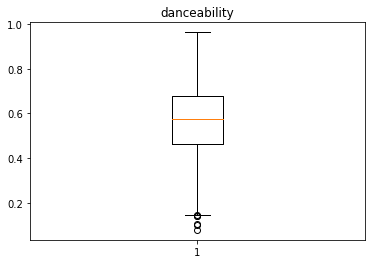

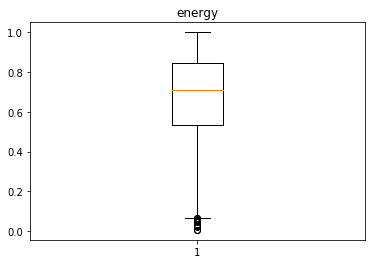

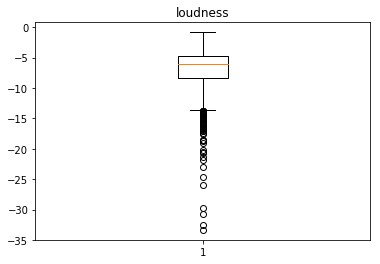

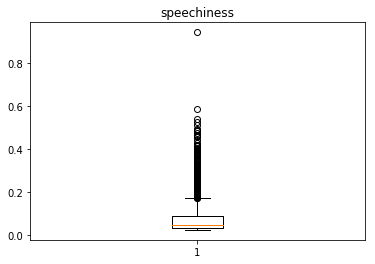

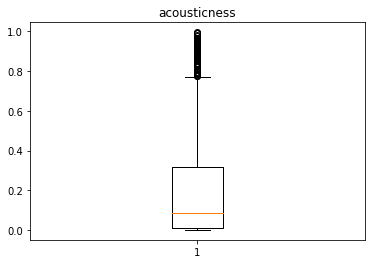

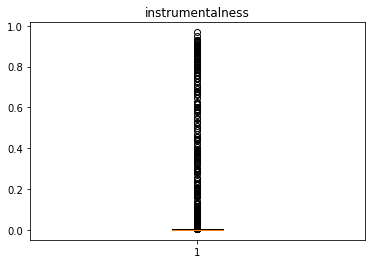

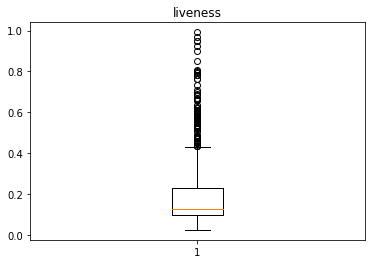

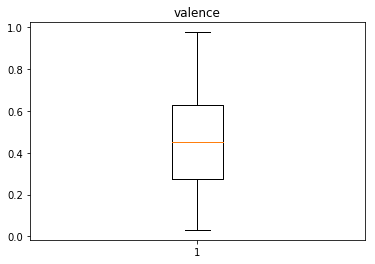

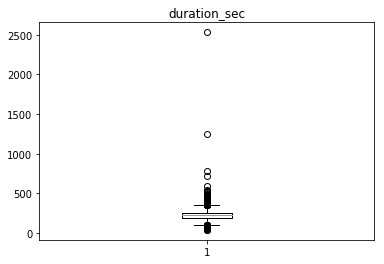

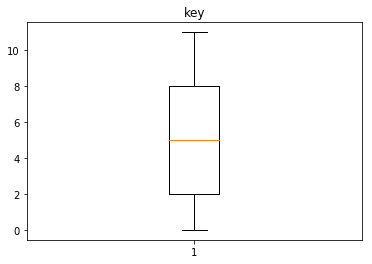

In [102]:
# Run plots function on data
plots(sf_13_ft, col_list)

In [103]:
# Danceability outliers
sf_13_ft[sf_13_ft['danceability'] < 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
5,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993000,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
32,Always There...In Our Hearts - Individual Shuf...,0.1740,0.91200,-4.763,1,0.0427,0.573000,0.003200,0.3660,0.0661,152.248,7,4,255.867,0
71,Through The Eyes Of A Child,0.1980,0.06490,-16.908,1,0.0385,0.810000,0.003790,0.0817,0.0402,77.814,0,4,274.413,0
189,Blood Like Cream,0.1410,0.93800,-6.452,1,0.0941,0.000005,0.202000,0.1950,0.2110,183.224,1,4,213.293,0
199,Blue Ocean Floor,0.1470,0.20400,-16.244,1,0.0515,0.786000,0.036800,0.1380,0.0781,180.856,2,4,439.467,0
235,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468000,0.896000,0.0851,0.0352,114.386,9,3,247.533,0
609,Fairweather Friends,0.1890,0.80000,-3.818,0,0.0931,0.011500,0.000108,0.8520,0.3220,187.788,11,4,223.387,0
628,O Father O Satan O Sun!,0.1590,0.92800,-4.116,1,0.0668,0.000404,0.000035,0.1510,0.1800,83.385,1,4,433.440,0
650,Finished Sympathy,0.1030,0.43600,-6.644,0,0.0402,0.019100,0.000050,0.0789,0.0391,179.893,7,4,502.493,0
689,Fragment 2,0.0784,0.12300,-13.846,1,0.0433,0.957000,0.929000,0.3100,0.0348,82.372,10,3,364.080,0


In [108]:
# Energy outliers
sf_13_ft[sf_13_ft['energy'] <= 0.15]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
5,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
54,Another Year Has Gone By,0.5220,0.06790,-22.955,1,0.0426,0.991,0.929000,0.1070,0.1790,74.007,4,4,247.124,0
71,Through The Eyes Of A Child,0.1980,0.06490,-16.908,1,0.0385,0.810,0.003790,0.0817,0.0402,77.814,0,4,274.413,0
97,Back When We Were Beautiful,0.4690,0.06550,-13.057,1,0.0350,0.949,0.000010,0.1350,0.1840,77.426,2,4,220.080,0
98,Backwaters,0.6160,0.08190,-13.531,0,0.0740,0.924,0.844000,0.1110,0.2600,111.564,11,3,147.300,0
158,You and Me - Piano Version,0.4310,0.13800,-11.964,0,0.0465,0.896,0.000000,0.1240,0.2560,99.144,10,4,238.490,0
177,Blackbird - Remastered 2009,0.6860,0.12700,-14.361,1,0.0342,0.754,0.000014,0.0573,0.3720,93.699,7,4,138.387,0
198,Blue Crystal Glow,0.4630,0.13400,-12.637,1,0.0319,0.941,0.000000,0.2990,0.0673,99.143,7,5,122.336,0
235,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468,0.896000,0.0851,0.0352,114.386,9,3,247.533,0
291,Can’t Help Falling in Love,0.2660,0.05960,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,0,3,201.933,0


In [113]:
# Speechiness outlier
sf_13_ft[sf_13_ft['speechiness'] > 0.66]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
686,Hard Candy and Formaldehyde,0.62,0.435,-15.95,1,0.945,0.93,0.0,0.947,0.464,110.686,6,1,247.707,0


In [114]:
# Acousticness outliers
sf_13_ft[sf_13_ft['acousticness'] >= 0.8]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
3,All I've Ever Needed,0.433,0.31000,-8.941,1,0.0305,0.880,0.004050,0.1180,0.1640,142.845,0,4,236.347,0
5,The Embrace,0.141,0.00726,-16.518,0,0.0471,0.993,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
7,All of Me,0.422,0.26400,-7.064,1,0.0322,0.922,0.000000,0.1320,0.3310,119.930,8,4,269.560,0
21,Alligator Girl,0.522,0.29600,-10.460,1,0.0302,0.948,0.619000,0.1050,0.3990,67.012,7,4,239.960,0
23,Almost Is Never Enough,0.400,0.33700,-7.404,1,0.0355,0.831,0.000000,0.0934,0.3520,108.196,2,5,327.773,0
26,Along for the Ride,0.487,0.18500,-12.970,1,0.0443,0.959,0.000012,0.1720,0.4000,78.882,2,4,188.105,0
38,Ingenue,0.684,0.54200,-10.559,1,0.0382,0.836,0.812000,0.1330,0.4410,96.880,5,4,270.067,0
54,Another Year Has Gone By,0.522,0.06790,-22.955,1,0.0426,0.991,0.929000,0.1070,0.1790,74.007,4,4,247.124,0
61,I Don't Wanna Do This Anymore,0.433,0.77800,-7.681,1,0.0410,0.843,0.000000,0.1390,0.7640,114.208,4,4,87.561,0
71,Through The Eyes Of A Child,0.198,0.06490,-16.908,1,0.0385,0.810,0.003790,0.0817,0.0402,77.814,0,4,274.413,0


In [115]:
# Liveness outliers
sf_13_ft[sf_13_ft['liveness'] > 0.9]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
96,God's Great Dance Floor,0.564,0.830,-8.783,1,0.0316,0.000163,0.00497,0.926,0.523,128.007,10,4,234.280,0
218,Ghost (Live) - 8/5/17 Boston Cream,0.446,0.612,-9.990,0,0.0345,0.239000,0.61700,0.967,0.642,122.255,9,4,1245.520,0
305,Carry on Jon - Live,0.339,0.327,-17.100,0,0.0437,0.628000,0.89100,0.992,0.267,211.903,4,3,381.336,0
686,Hard Candy and Formaldehyde,0.620,0.435,-15.950,1,0.9450,0.930000,0.00000,0.947,0.464,110.686,6,1,247.707,0
1009,"I Like It, I Love It",0.643,0.961,-5.298,1,0.0315,0.019600,0.00000,0.948,0.960,124.027,0,4,205.707,0


In [151]:
# Update CSV file with edits made
sf_13_ft.to_csv('./data/REVAMPED_2013_songfacts_features')

In [105]:
# Summary Statistics
sf_13_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1423.0,0.570065,0.155858,0.078400,0.46450,0.577000,0.67700,0.964
energy,1423.0,0.673722,0.213568,0.007260,0.53400,0.710000,0.84600,0.999
loudness,1423.0,-6.890707,3.429753,-33.350000,-8.29950,-6.088000,-4.68400,-0.818
mode,1423.0,0.659171,0.474155,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,1423.0,0.085411,0.090883,0.023500,0.03470,0.047900,0.09035,0.945
acousticness,1423.0,0.215714,0.273794,0.000003,0.00920,0.084300,0.31500,0.996
instrumentalness,1423.0,0.061736,0.186842,0.000000,0.00000,0.000008,0.00234,0.968
liveness,1423.0,0.183585,0.141182,0.023700,0.09765,0.126000,0.23050,0.992
valence,1423.0,0.461700,0.230370,0.031200,0.27550,0.451000,0.62800,0.976
tempo,1423.0,123.156174,29.889224,60.048000,98.55600,122.790000,142.44500,211.903


### Master

In [31]:
eda(master_13_ft)

(1523, 15)
0


In [32]:
# Null values in the master file are the same as those we dropped in sf_13_ft
master_13_ft.dropna(inplace=True)

# Check shape after drop
master_13_ft.shape

(1523, 15)

In [33]:
# Update CSV file with edits made
master_13_ft.to_csv('./data/MASTER_2013_audio_features')

In [34]:
# Summary Statistics
master_13_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1523.0,0.574231,0.155214,0.078400,0.46900,0.580000,0.67900,0.964
energy,1523.0,0.674610,0.210603,0.007260,0.53900,0.709000,0.84300,0.999
loudness,1523.0,-6.818552,3.362199,-33.350000,-8.19650,-6.036000,-4.67550,-0.818
mode,1523.0,0.657912,0.474565,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,1523.0,0.085597,0.090874,0.023500,0.03495,0.048300,0.09025,0.945
acousticness,1523.0,0.211270,0.270310,0.000003,0.00961,0.080800,0.30700,0.996
instrumentalness,1523.0,0.058193,0.181778,0.000000,0.00000,0.000006,0.00158,0.968
liveness,1523.0,0.183030,0.140901,0.023700,0.09740,0.126000,0.23100,0.992
valence,1523.0,0.464965,0.229728,0.031200,0.27900,0.457000,0.63300,0.976
tempo,1523.0,123.075274,29.839338,60.048000,98.39350,122.744000,142.44500,211.903


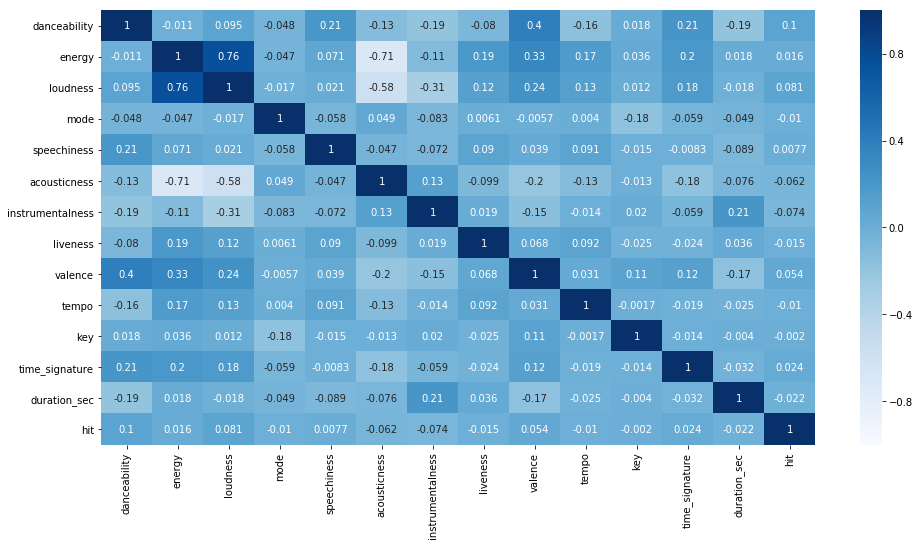

In [35]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(master_13_ft.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

# 2008 Audio Features
### Billboard

In [36]:
# Run eda function on data
eda(bb_08_ft)

(99, 15)
0


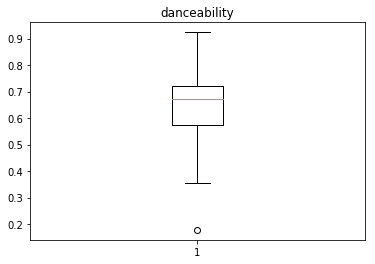

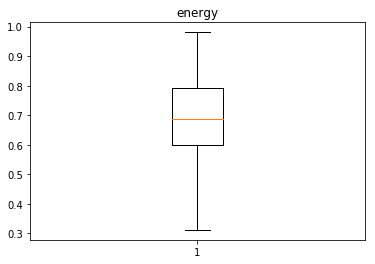

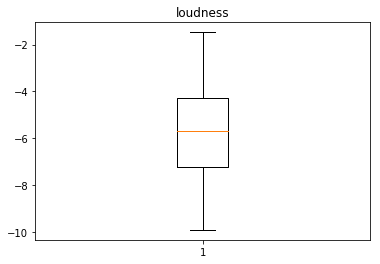

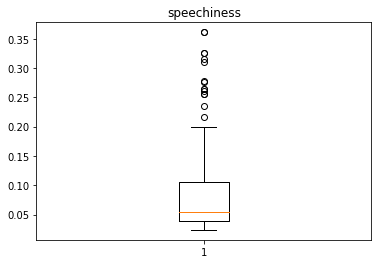

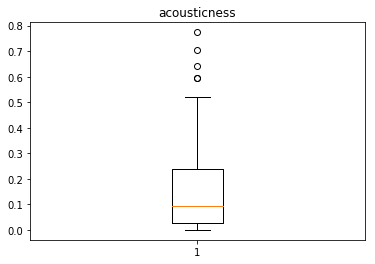

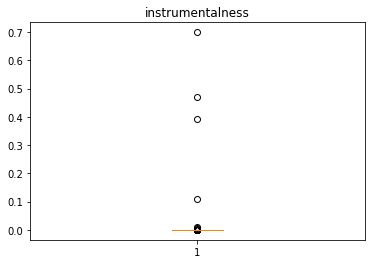

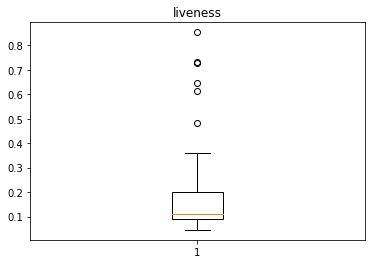

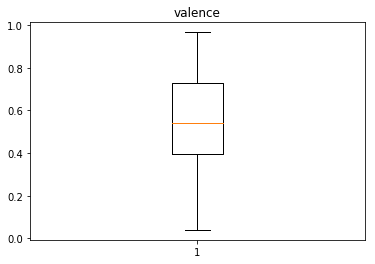

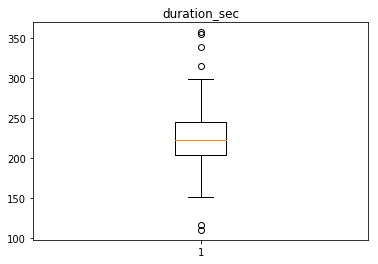

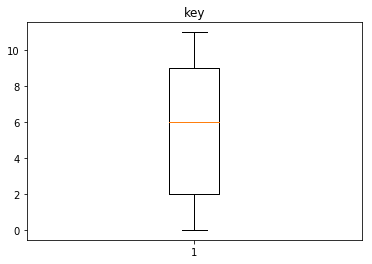

In [37]:
# Run plots function on data
plots(bb_08_ft, col_list)

In [92]:
# Danceability outlier
bb_08_ft[bb_08_ft['danceability'] < 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
85,Fell In Love With A Girl,0.178,0.981,-1.743,0,0.162,0.704,0.000074,0.854,0.369,88.21,4,4,110.093,1


In [112]:
# Speechiness outliers
bb_08_ft[bb_08_ft['speechiness'] > 0.2]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
9,Forever,0.544,0.920,-1.474,0,0.277,0.24400,0.000000,0.1900,0.519,105.307,5,5,357.347,1
10,Sexy Can I feat. Yung Berg,0.575,0.684,-6.007,1,0.325,0.29900,0.000000,0.6140,0.926,172.155,1,4,204.040,1
28,Armed And Dangerous,0.736,0.670,-6.702,1,0.311,0.18600,0.000000,0.1140,0.845,130.032,10,4,169.999,1
34,Paper Planes,0.457,0.854,-6.200,1,0.265,0.02770,0.000096,0.7310,0.485,172.231,2,4,203.760,1
36,Live Your Life (feat. Rihanna),0.375,0.862,-3.363,0,0.255,0.07100,0.000000,0.2110,0.478,159.841,11,4,338.853,1
38,American Boy,0.727,0.729,-2.990,1,0.326,0.17100,0.000000,0.0700,0.512,117.932,0,4,284.733,1
39,Got Money,0.442,0.638,-5.053,1,0.260,0.00199,0.000000,0.6460,0.706,82.206,7,4,244.627,1
42,A Milli,0.679,0.684,-8.559,1,0.278,0.05270,0.000895,0.1770,0.755,151.748,6,4,221.840,1
43,Sorry Not Sorry,0.702,0.635,-6.917,0,0.265,0.02230,0.000000,0.2830,0.873,144.004,11,4,203.760,1
61,Superstar (feat. Matthew Santos),0.572,0.822,-6.015,0,0.361,0.20700,0.000000,0.3590,0.472,94.812,11,4,289.000,1


In [94]:
# Acousticness outliers
bb_08_ft[bb_08_ft['acousticness'] >= 0.6]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
23,what are you so afraid of,0.639,0.312,-9.902,1,0.0301,0.774,0.469000,0.0857,0.347,103.369,0,4,150.769,1
62,Suffocate - Superclean,0.458,0.445,-8.391,0,0.3610,0.640,0.000000,0.1180,0.447,82.820,9,5,220.053,1
85,Fell In Love With A Girl,0.178,0.981,-1.743,0,0.1620,0.704,0.000074,0.8540,0.369,88.210,4,4,110.093,1


In [95]:
# Instrumentalness outliers
bb_08_ft[bb_08_ft['instrumentalness'] >= 0.4]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
23,what are you so afraid of,0.639,0.312,-9.902,1,0.0301,0.774,0.469,0.0857,0.347,103.369,0,4,150.769,1
94,The Way I Are,0.734,0.808,-6.448,0,0.1060,0.189,0.699,0.3150,0.805,114.764,3,4,179.120,1


In [96]:
# Liveness outliers
bb_08_ft[bb_08_ft['liveness'] >= 0.5]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
10,Sexy Can I feat. Yung Berg,0.575,0.684,-6.007,1,0.3250,0.29900,0.000000,0.614,0.926,172.155,1,4,204.040,1
34,Paper Planes,0.457,0.854,-6.200,1,0.2650,0.02770,0.000096,0.731,0.485,172.231,2,4,203.760,1
39,Got Money,0.442,0.638,-5.053,1,0.2600,0.00199,0.000000,0.646,0.706,82.206,7,4,244.627,1
82,Santa Claus Is Comin' to Town - Live at C.W. P...,0.355,0.668,-8.444,1,0.0482,0.36200,0.000001,0.727,0.413,139.734,0,4,267.600,1
85,Fell In Love With A Girl,0.178,0.981,-1.743,0,0.1620,0.70400,0.000074,0.854,0.369,88.210,4,4,110.093,1


In [38]:
# Summary Statistics
bb_08_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,99.0,0.645727,0.130966,0.17800,0.57250,0.6710,0.722500,0.924
energy,99.0,0.685798,0.150764,0.31200,0.59800,0.6870,0.791000,0.981
loudness,99.0,-5.842838,1.909108,-9.90200,-7.19850,-5.6730,-4.276500,-1.474
mode,99.0,0.646465,0.480500,0.00000,0.00000,1.0000,1.000000,1.000
speechiness,99.0,0.097086,0.089942,0.02390,0.03870,0.0553,0.105000,0.361
acousticness,99.0,0.165649,0.178451,0.00008,0.02865,0.0930,0.237500,0.774
instrumentalness,99.0,0.017126,0.092883,0.00000,0.00000,0.0000,0.000008,0.699
liveness,99.0,0.170970,0.152858,0.04510,0.08985,0.1100,0.200500,0.854
valence,99.0,0.548855,0.228151,0.03960,0.39350,0.5420,0.729500,0.966
tempo,99.0,120.718020,26.568767,77.96900,100.43500,120.0000,138.508500,184.045


### Songfacts

In [39]:
# Run eda function on data
eda(sf_08_ft)

(1408, 15)
0


In [40]:
# Checking for duplicates
sf_08_ft[sf_08_ft.iloc[:, 1:].duplicated(keep=False)]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit


In [41]:
'''
During the data collection of titles, a try and except statement was created in case an error
occured while interfacing with Spotifys API.
All "title" == Error means an error occured. The Error titles make EDA for this section ambiguous.
'''

sf_08_ft[sf_08_ft['title'] == 'Error'][:10]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
0,Error,0.688,0.637,-8.837,1.0,0.3940,0.06860,0.000000,0.2180,0.574,98.728,2.0,4.0,299.640,0
1,Error,0.669,0.530,-8.493,0.0,0.3000,0.12600,0.000070,0.1110,0.399,74.995,5.0,4.0,297.547,0
2,Error,0.670,0.817,-6.693,0.0,0.0311,0.02230,0.002760,0.2770,0.381,128.019,9.0,4.0,287.667,0
3,Error,0.502,0.791,-3.221,1.0,0.0331,0.24500,0.000000,0.1020,0.207,75.676,10.0,4.0,252.800,0
4,Error,0.537,0.620,-6.544,1.0,0.0278,0.08400,0.000006,0.3980,0.447,108.022,7.0,4.0,188.200,0
5,Error,0.329,0.195,-16.856,1.0,0.0316,0.81800,0.000003,0.2990,0.383,70.141,7.0,5.0,215.827,0
6,Error,0.601,0.716,-6.515,1.0,0.0449,0.08270,0.000301,0.0661,0.844,172.056,0.0,4.0,188.613,0
7,Error,0.347,0.274,-14.298,1.0,0.0281,0.56300,0.010600,0.0985,0.522,173.826,9.0,4.0,372.360,0
8,Error,0.553,0.824,-5.900,1.0,0.0385,0.00624,0.000310,0.5830,0.372,148.905,5.0,4.0,247.680,0
9,Error,0.546,0.562,-9.577,1.0,0.0287,0.07900,0.896000,0.0496,0.331,151.934,0.0,4.0,395.364,0


In [42]:
# Drop null values
sf_08_ft.dropna(inplace=True)

# Check shape after drops
sf_08_ft.shape

(1408, 15)

In [152]:
# Update CSV with edits made
sf_08_ft.to_csv('./data/REVAMPED_2008_songfacts_features')

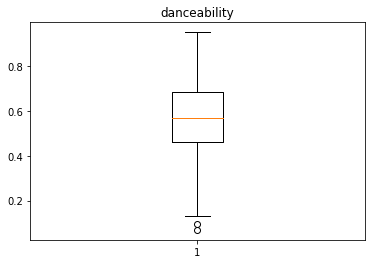

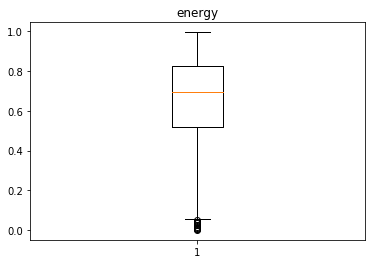

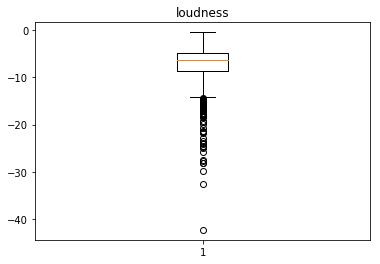

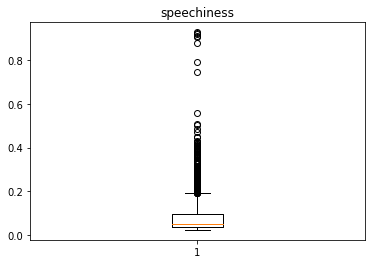

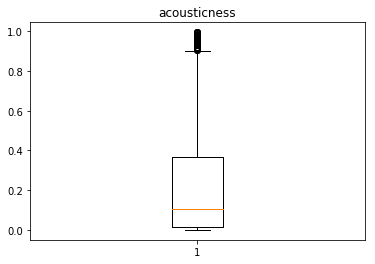

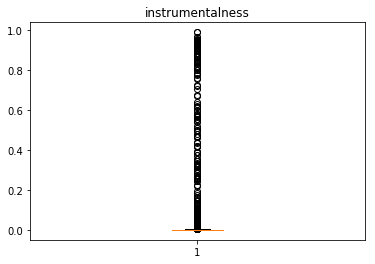

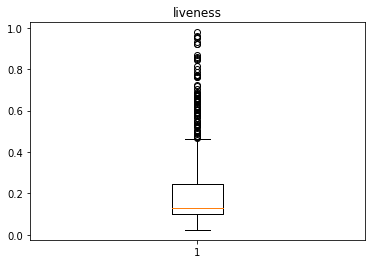

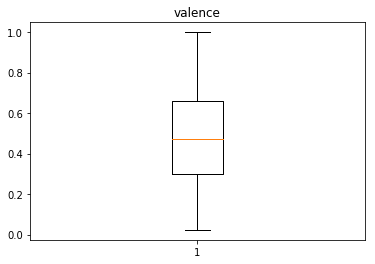

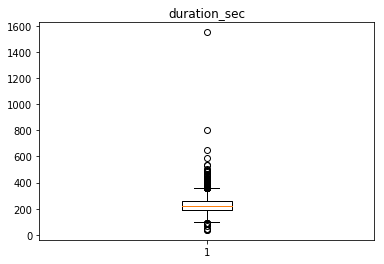

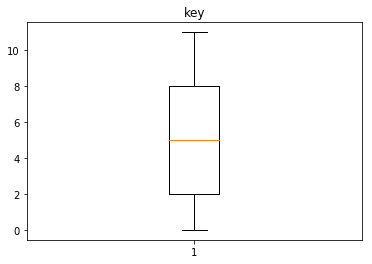

In [44]:
# Run plots function on data
plots(sf_08_ft, col_list)

In [106]:
# Danceability outliers
sf_08_ft[sf_08_ft['danceability'] < 0.2][:5]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
85,Error,0.0693,0.006700,-29.918,0.0,0.0417,0.983000,0.953,0.0909,0.0384,76.698,2.0,1.0,164.000,0
174,Error,0.1570,0.000533,-15.360,1.0,0.1090,0.000148,0.988,0.3580,0.0232,129.597,2.0,5.0,168.303,0
185,Error,0.1670,0.765000,-6.513,1.0,0.0693,0.260000,0.422,0.6700,0.1150,174.030,0.0,4.0,278.040,0
212,Error,0.0938,0.036100,-32.479,1.0,0.0439,0.958000,0.965,0.0819,0.0561,74.105,7.0,4.0,255.000,0
295,Error,0.1710,0.955000,-3.627,1.0,0.1430,0.001600,0.000,0.3530,0.3730,160.284,2.0,4.0,132.867,0


In [107]:
# Energy outliers
sf_08_ft[sf_08_ft['energy'] <= 0.15][:5]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
11,Error,0.3470,0.08240,-28.045,0.0,0.0441,0.798,0.907000,0.1080,0.0625,91.965,10.0,3.0,190.443,0
27,Error,0.4830,0.01650,-25.040,1.0,0.0414,0.994,0.936000,0.1190,0.1800,138.222,10.0,3.0,161.715,0
85,Error,0.0693,0.00670,-29.918,0.0,0.0417,0.983,0.953000,0.0909,0.0384,76.698,2.0,1.0,164.000,0
92,Error,0.5430,0.03920,-24.606,1.0,0.0371,0.975,0.000822,0.1060,0.0577,119.105,9.0,4.0,208.982,0
148,Error,0.3920,0.00361,-42.293,0.0,0.0444,0.966,0.948000,0.0822,0.3530,117.774,2.0,4.0,108.733,0


In [45]:
# Summary Statistics
sf_08_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1408.0,0.569425,0.161704,0.069300,0.46300,0.568500,0.687250,0.952
energy,1408.0,0.653022,0.220459,0.000533,0.51600,0.695500,0.824000,0.995
loudness,1408.0,-7.240675,3.928315,-42.293000,-8.57825,-6.355500,-4.779000,-0.463
mode,1408.0,0.657670,0.474658,0.000000,0.00000,1.000000,1.000000,1.000
speechiness,1408.0,0.091076,0.106628,0.022900,0.03410,0.048200,0.096675,0.929
acousticness,1408.0,0.234850,0.282930,0.000002,0.01315,0.103500,0.369250,0.995
instrumentalness,1408.0,0.064002,0.197447,0.000000,0.00000,0.000004,0.001495,0.989
liveness,1408.0,0.191208,0.151308,0.024300,0.09885,0.130000,0.245250,0.978
valence,1408.0,0.484013,0.232477,0.023200,0.29900,0.474000,0.660000,0.999
tempo,1408.0,122.613748,29.927038,57.902000,97.46850,121.604500,142.100500,205.570


### Master

In [46]:
# Run eda function on data
eda(master_08_ft)

(1507, 15)
0


In [47]:
master_08_ft.head()

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
0,All Time Low,0.584,0.569,-4.259,1.0,0.1660,0.0508,0.000000,0.0924,0.501,89.779,0.0,4.0,217.603,1
1,Bleeding Love,0.638,0.656,-5.886,1.0,0.0357,0.1880,0.000000,0.1460,0.225,104.036,5.0,4.0,262.467,1
2,No One Compares To You,0.703,0.748,-6.047,1.0,0.0435,0.1230,0.000000,0.0642,0.625,111.943,1.0,4.0,184.080,1
3,Lollipop,0.828,0.433,-9.716,1.0,0.1990,0.0656,0.000876,0.1220,0.440,148.073,0.0,4.0,299.333,1
4,Apologize,0.591,0.718,-6.025,1.0,0.0368,0.3480,0.000118,0.1070,0.468,117.995,8.0,4.0,208.107,1


In [48]:
# Summary Statistics
master_08_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1507.0,0.574438,0.160944,0.069300,0.4670,0.576000,0.693000,0.952
energy,1507.0,0.655175,0.216684,0.000533,0.5240,0.695000,0.821000,0.995
loudness,1507.0,-7.148847,3.843749,-42.293000,-8.4855,-6.284000,-4.762500,-0.463
mode,1507.0,0.656934,0.474891,0.000000,0.0000,1.000000,1.000000,1.000
speechiness,1507.0,0.091470,0.105597,0.022900,0.0343,0.048800,0.097100,0.929
acousticness,1507.0,0.230304,0.277765,0.000002,0.0144,0.102000,0.364500,0.995
instrumentalness,1507.0,0.060922,0.192663,0.000000,0.0000,0.000003,0.001045,0.989
liveness,1507.0,0.189878,0.151442,0.024300,0.0981,0.127000,0.239000,0.978
valence,1507.0,0.488273,0.232676,0.023200,0.3030,0.477000,0.664500,0.999
tempo,1507.0,122.489211,29.713758,57.902000,97.7285,121.300000,141.973500,205.570


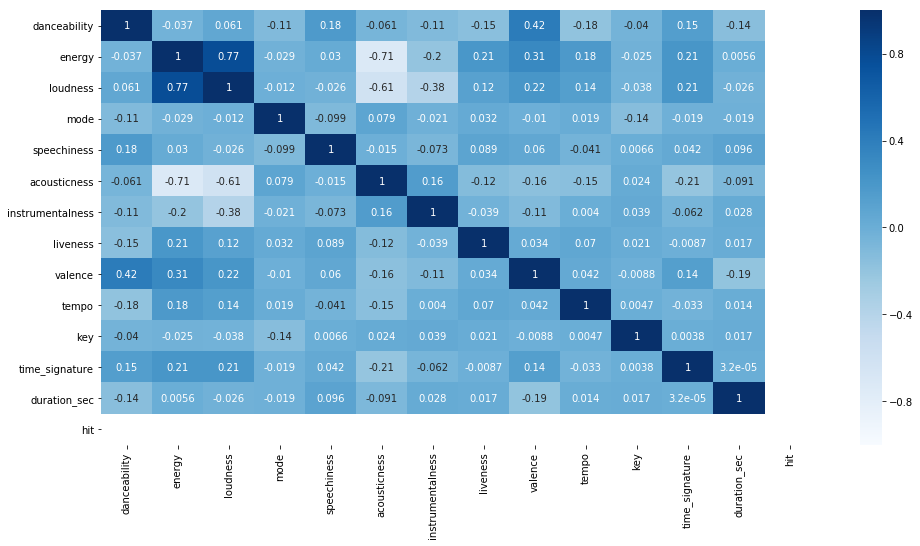

In [49]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(sf_08_ft.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

# All Billboard Audio Features

In [50]:
# Concatenate all billboard audio features dataframes
master_bb = pd.concat([bb_18_ft, bb_13_ft, bb_08_ft])

In [51]:
master_bb.shape

(298, 15)

In [149]:
master_bb.to_csv('./data/MASTER_allBILLBOARD_audio_features')

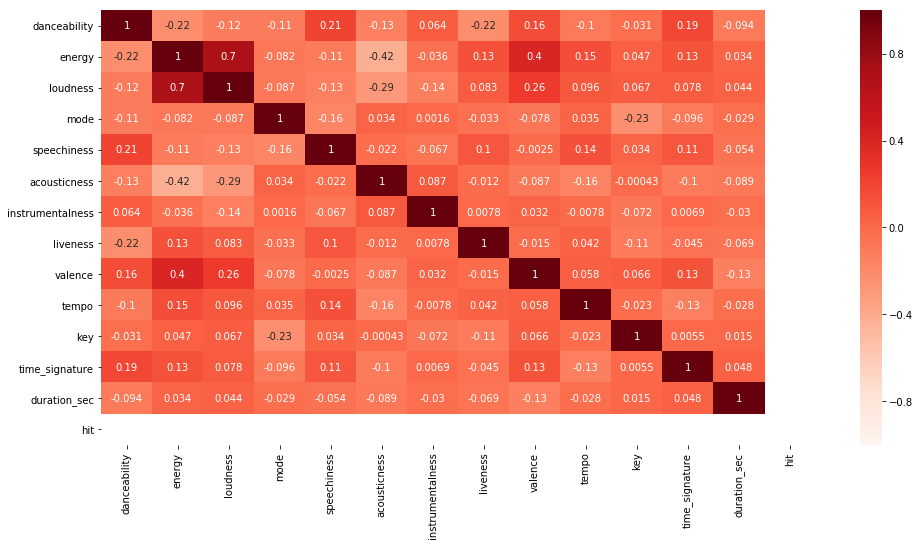

In [52]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(master_bb.corr(), annot=True, vmin=-1, vmax=1, cmap='Reds');

# All Master Files

In [53]:
# Concatenate all master audio features dataframes
master = pd.concat([master_08_ft, master_13_ft, master_18_ft], sort=False)

In [54]:
# Drop 'Unnamed: 0.1' column
master.drop('Unnamed: 0.1', axis=1, inplace=True)
master.shape

(4427, 15)

In [150]:
master.to_csv('./data/all_master_files')

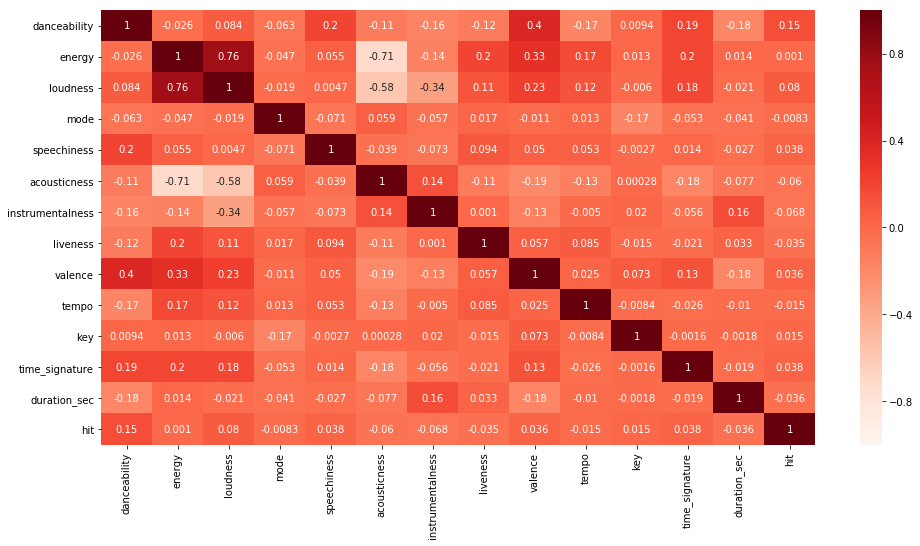

In [55]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(master.corr(), annot=True, vmin=-1, vmax=1, cmap='Reds');

# Histograms
**Run histograms function on billboard and songfacts data for comparisons of distributions.**

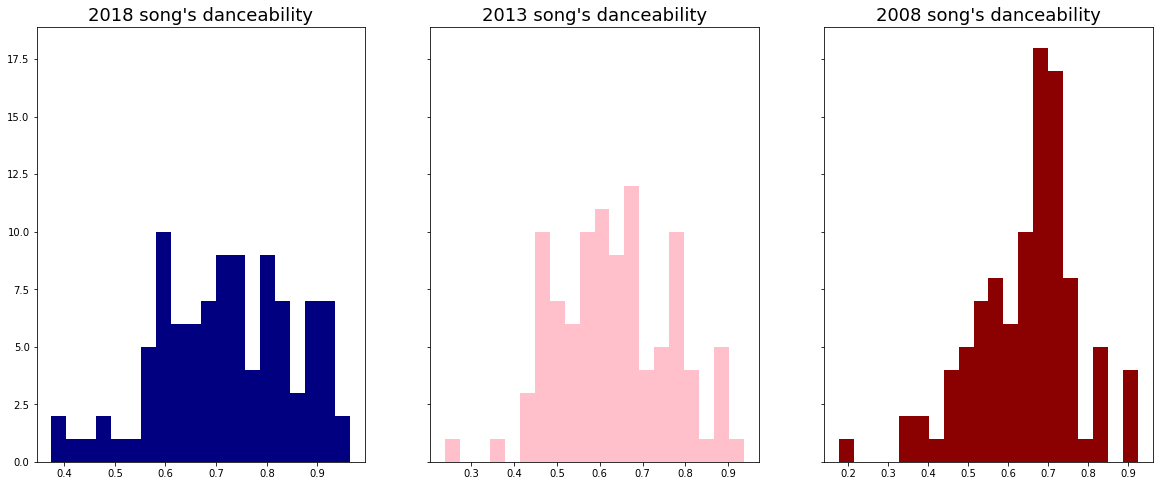

In [56]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'danceability')

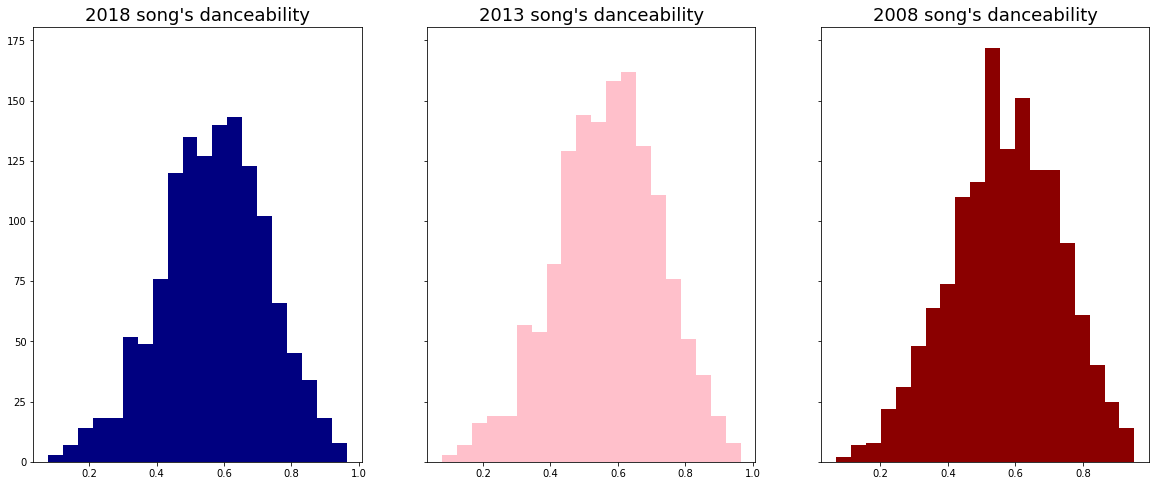

In [57]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'danceability')

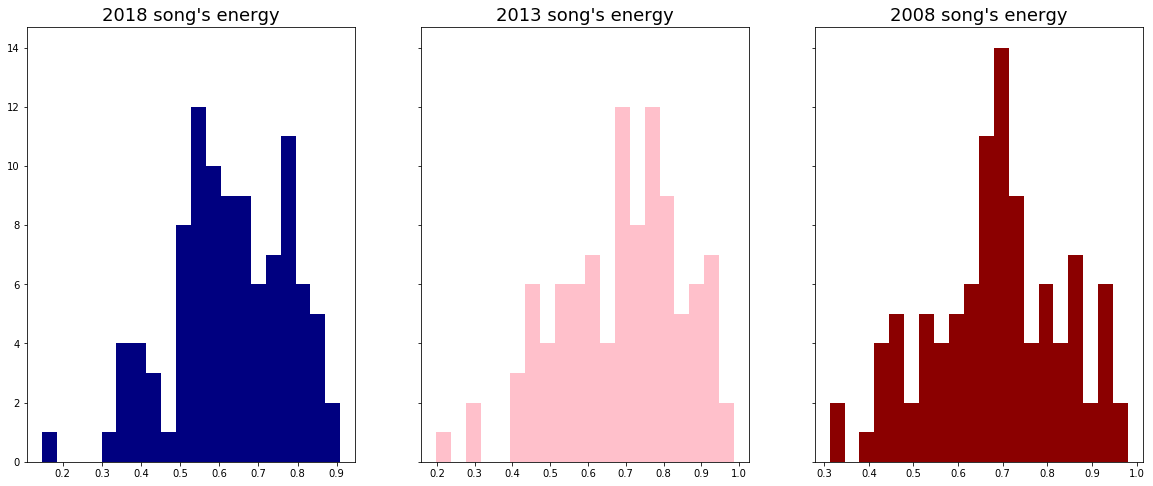

In [58]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'energy')

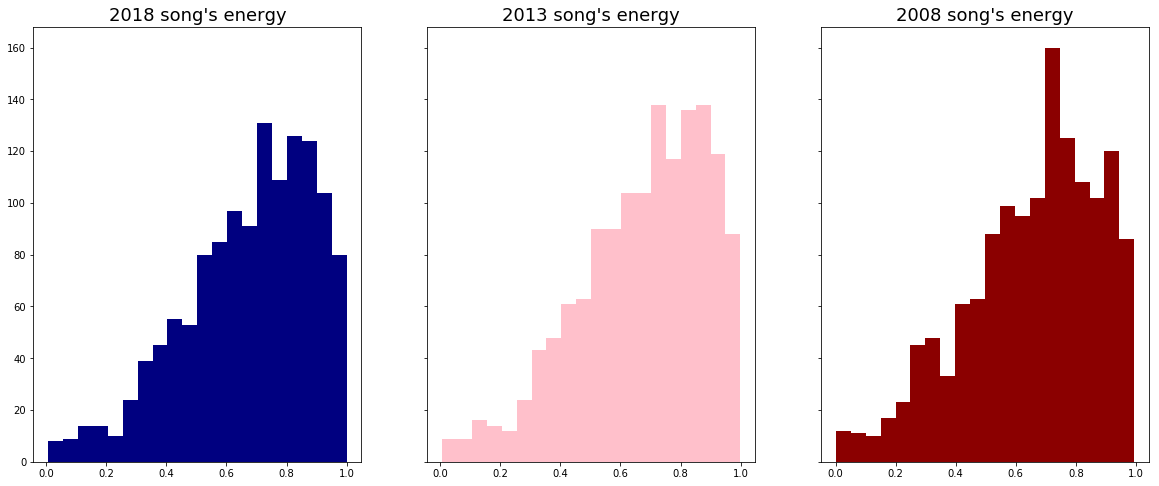

In [59]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'energy')

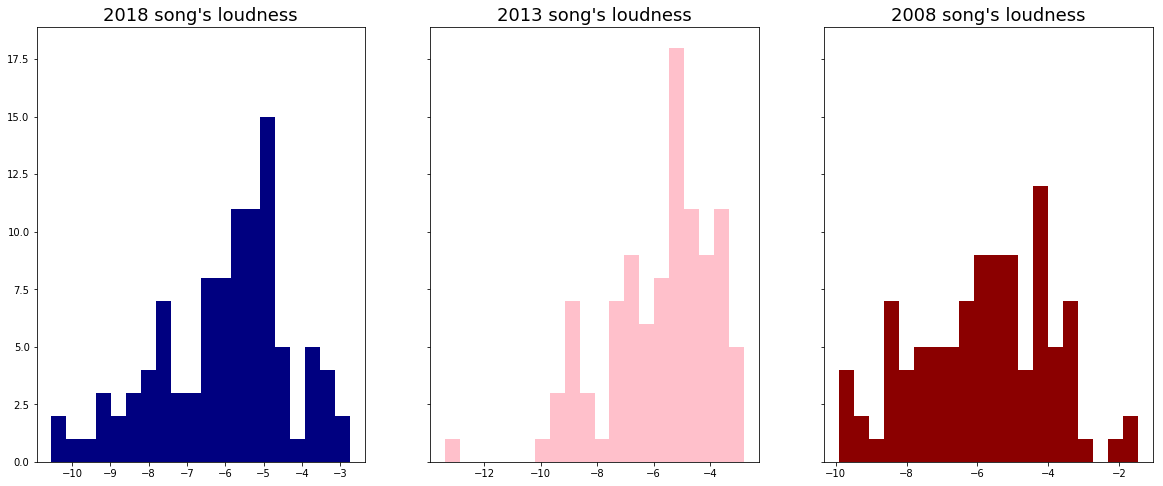

In [60]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'loudness')

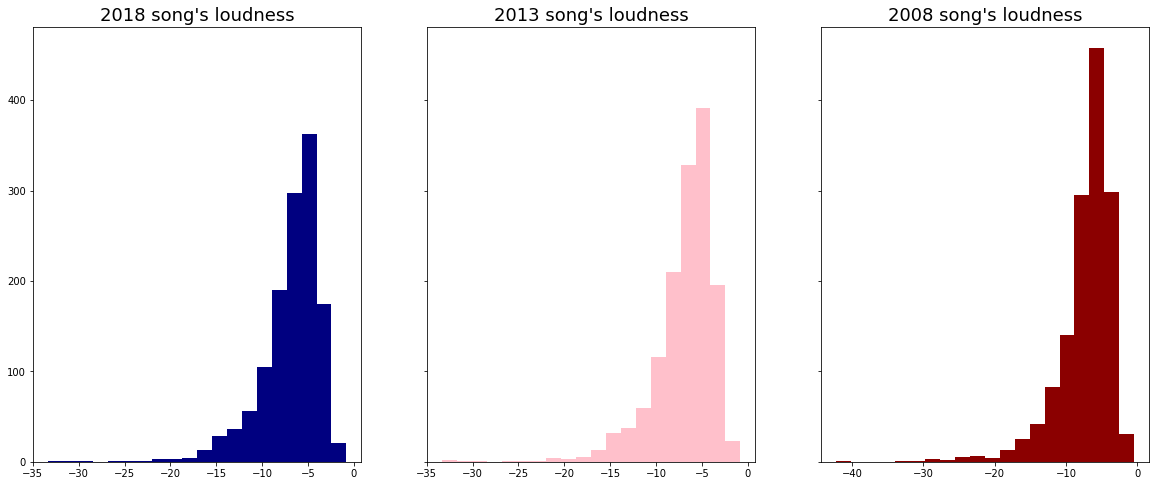

In [61]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'loudness')

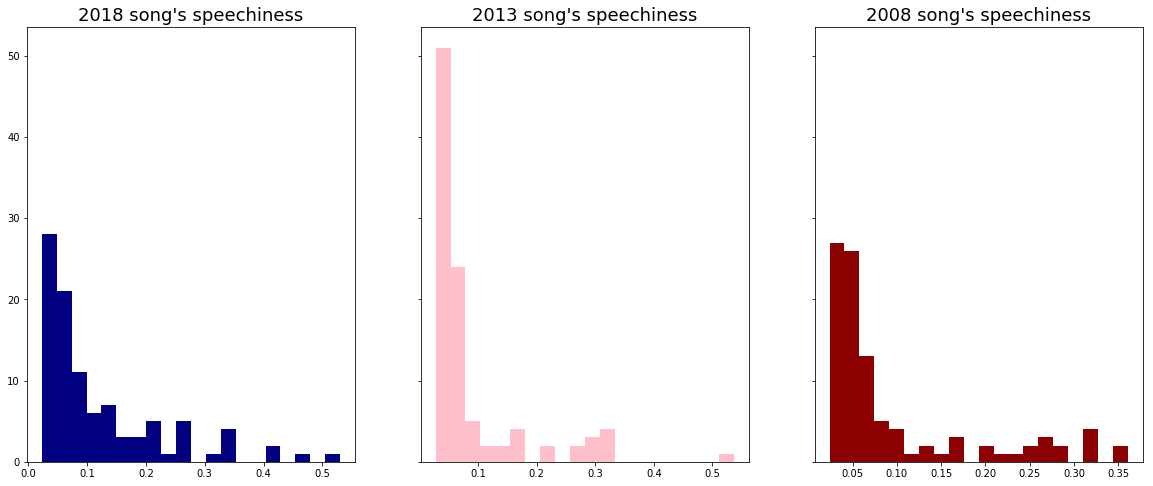

In [64]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'speechiness')

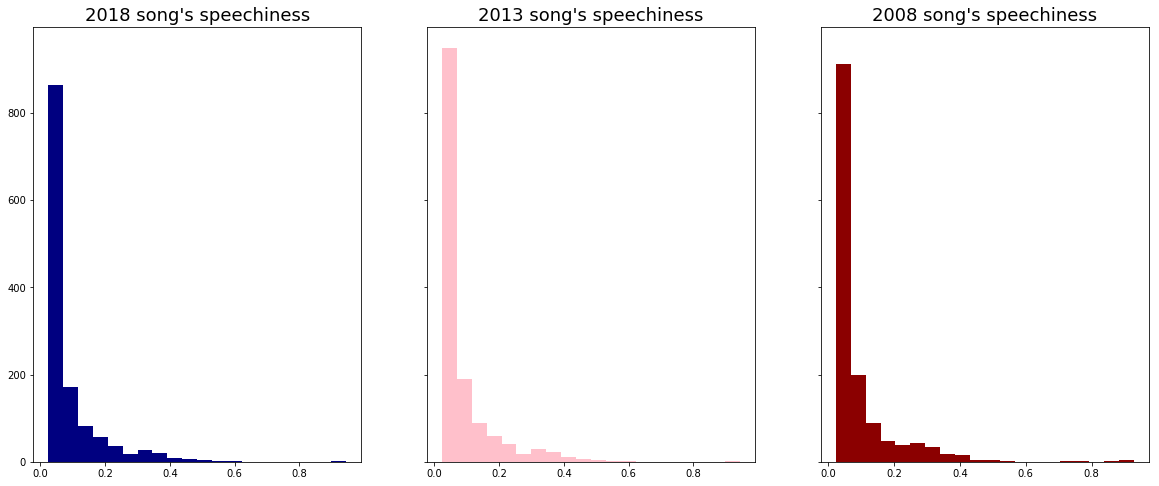

In [65]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'speechiness')

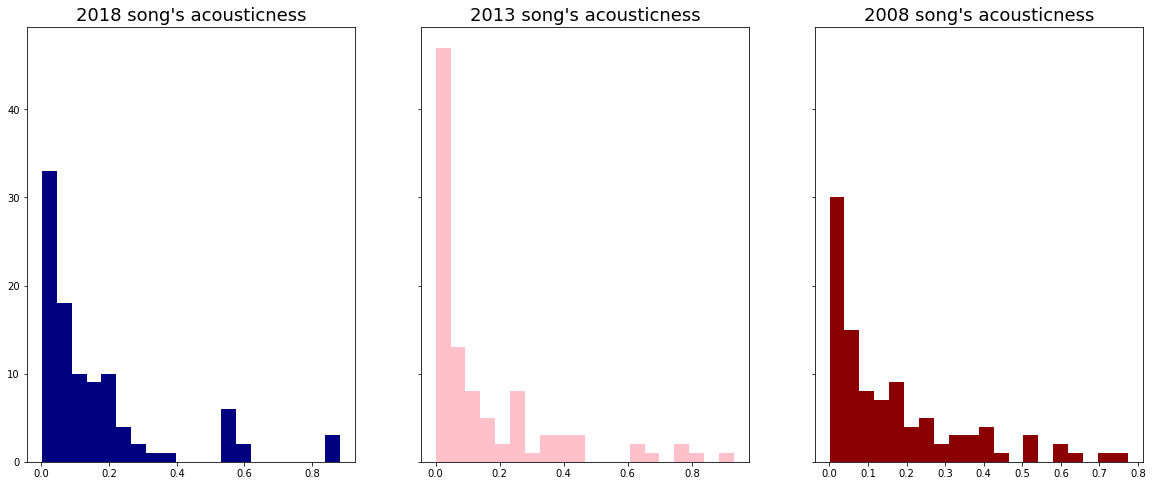

In [66]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'acousticness')

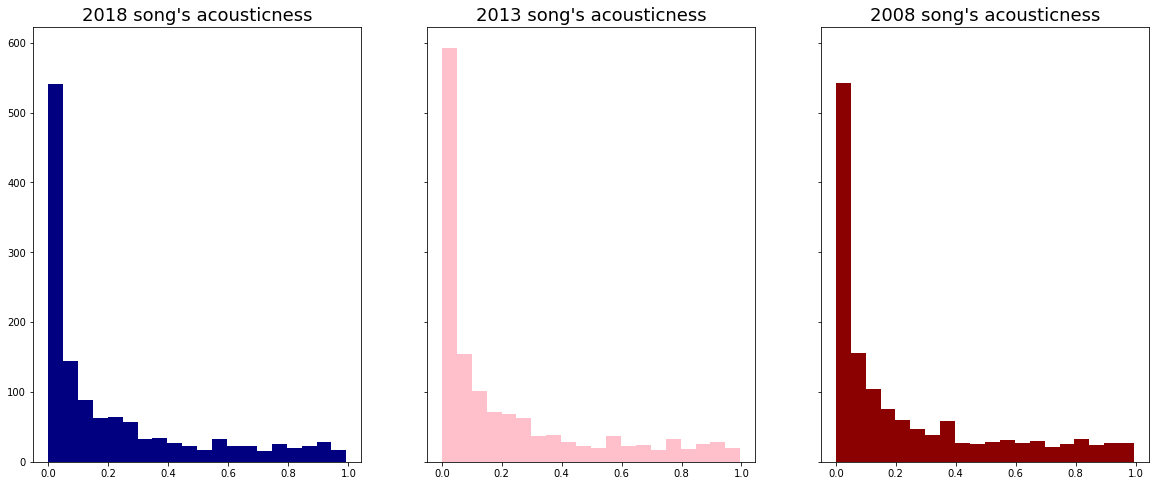

In [67]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'acousticness')

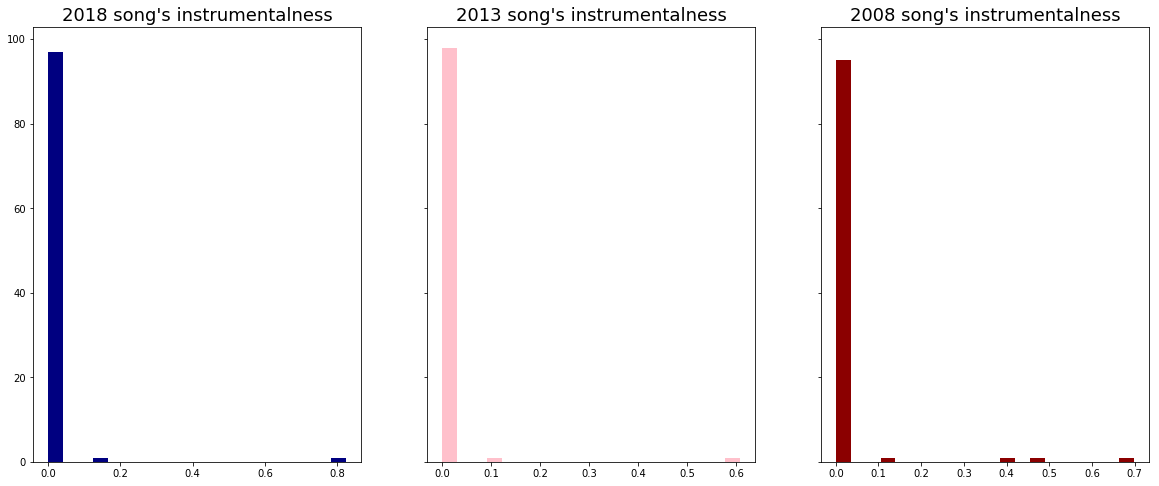

In [68]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'instrumentalness')

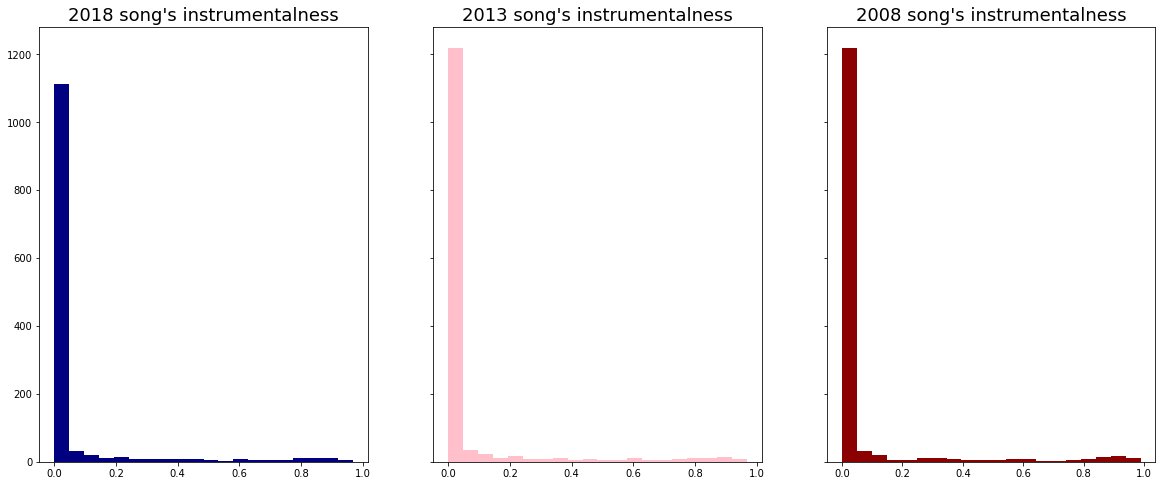

In [69]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'instrumentalness')

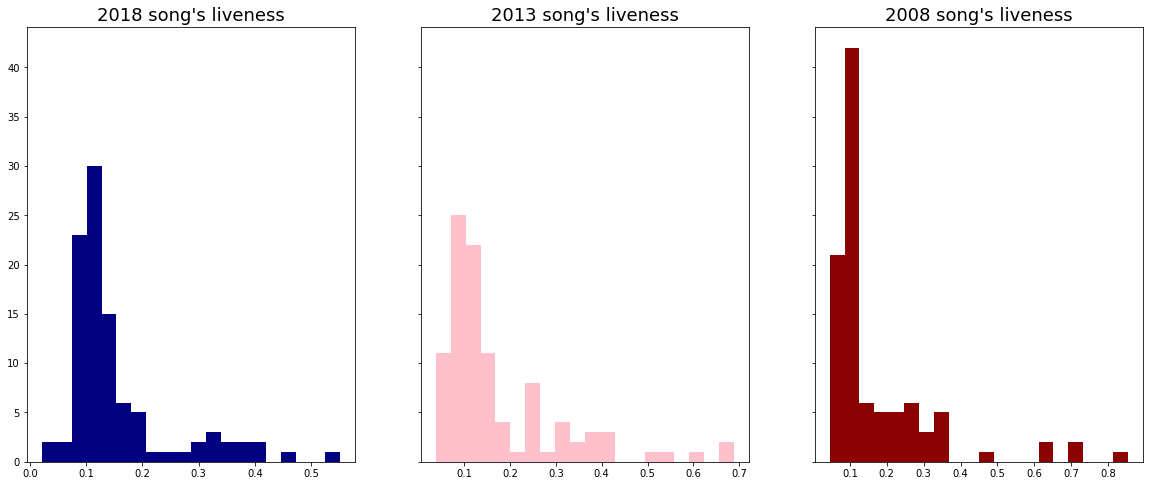

In [70]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'liveness')

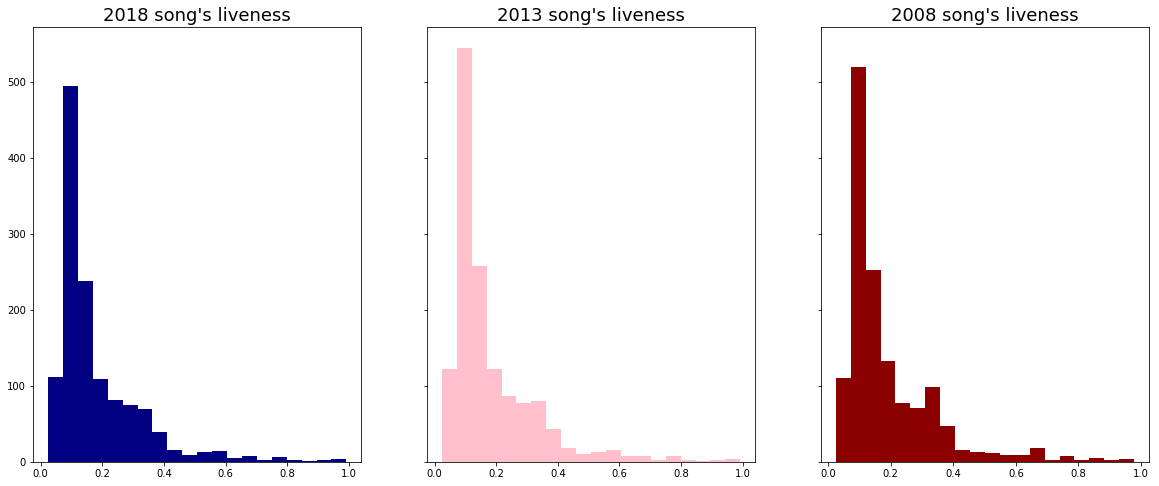

In [71]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'liveness')

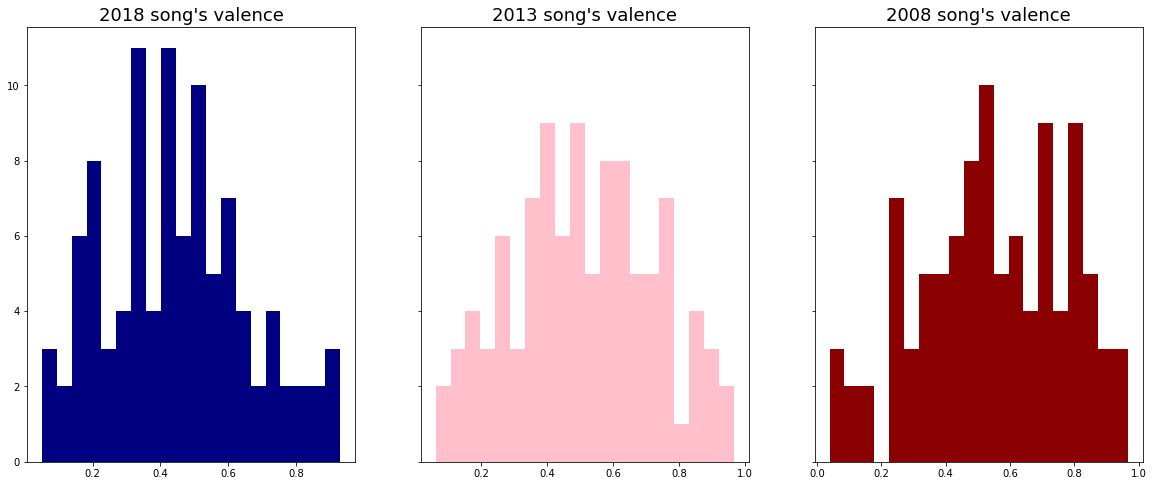

In [72]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'valence')

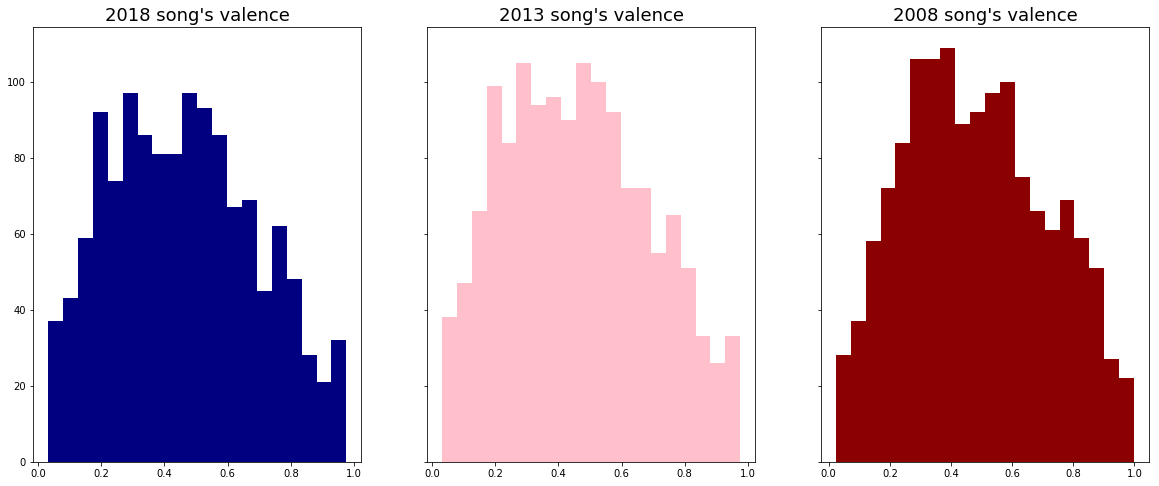

In [73]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'valence')

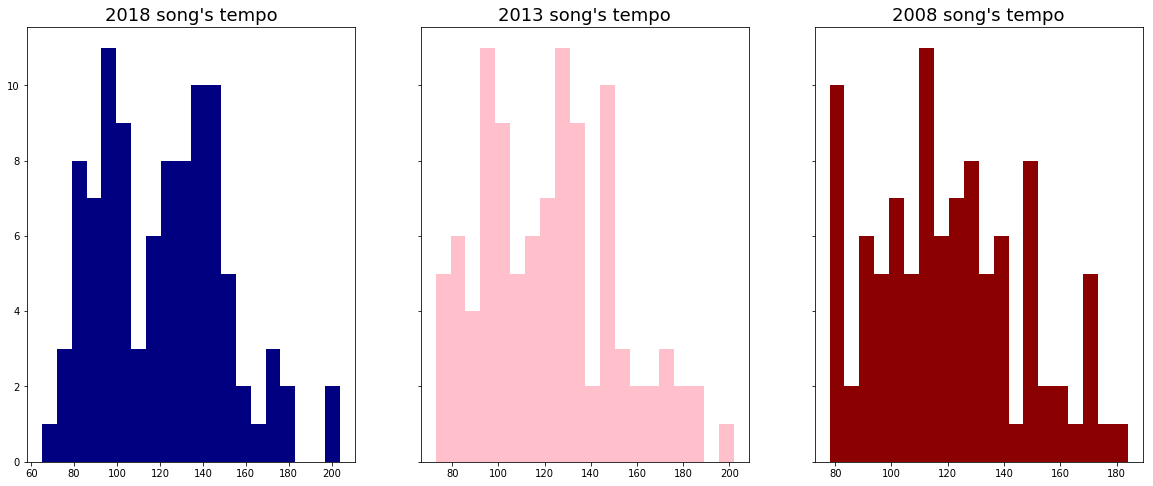

In [74]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'tempo')

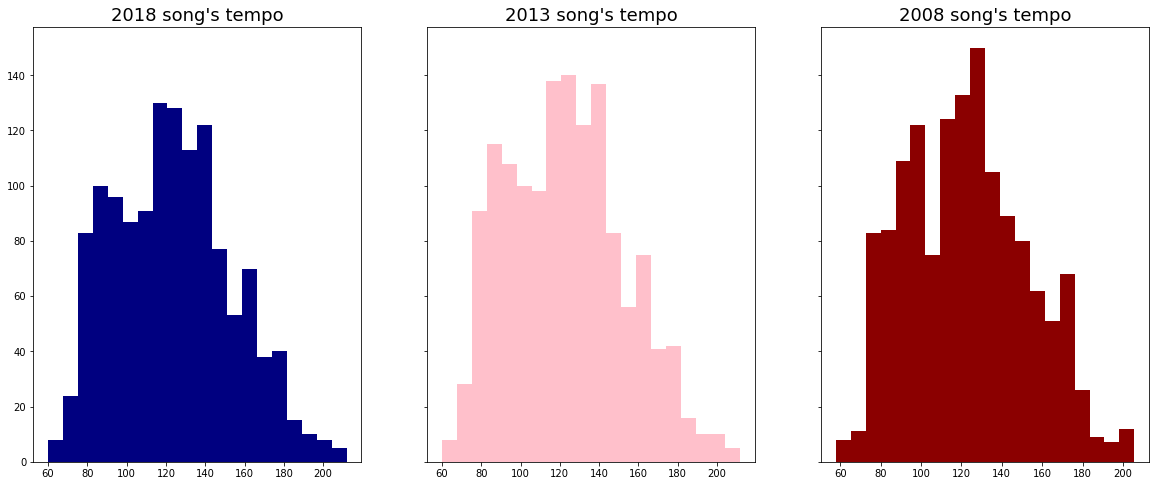

In [75]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'tempo')

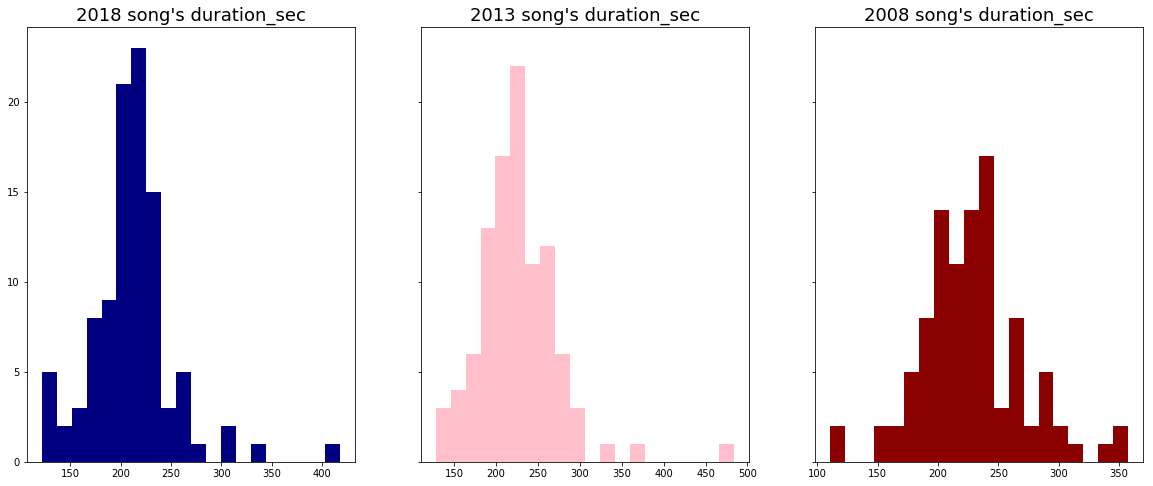

In [76]:
# Billboard
histograms(df1 = bb_18_ft, df2 = bb_13_ft, df3 = bb_08_ft, column = 'duration_sec')

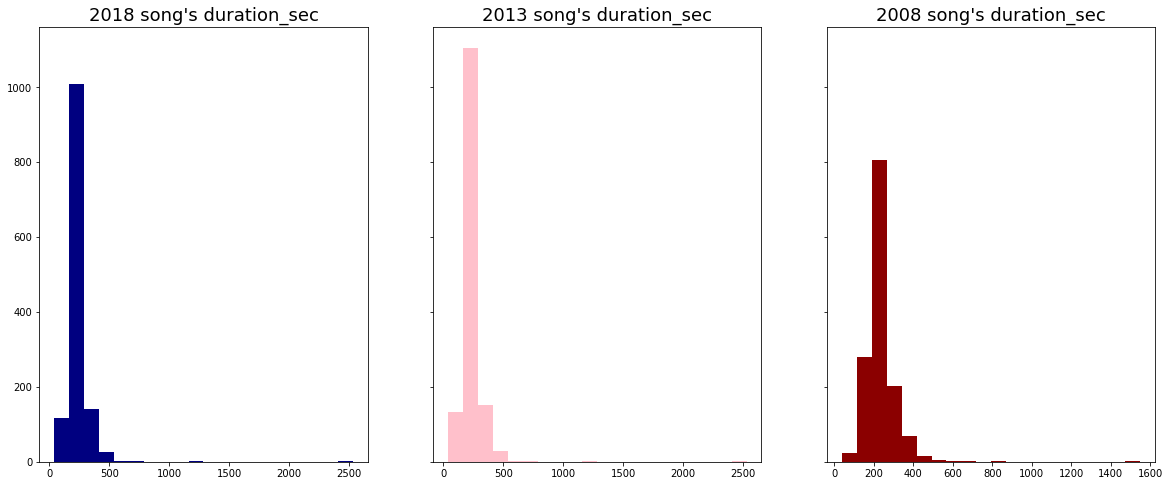

In [77]:
# Songfacts
histograms(df1 = sf_18_ft, df2 = sf_13_ft, df3 = sf_08_ft, column = 'duration_sec')

# Master csv files 

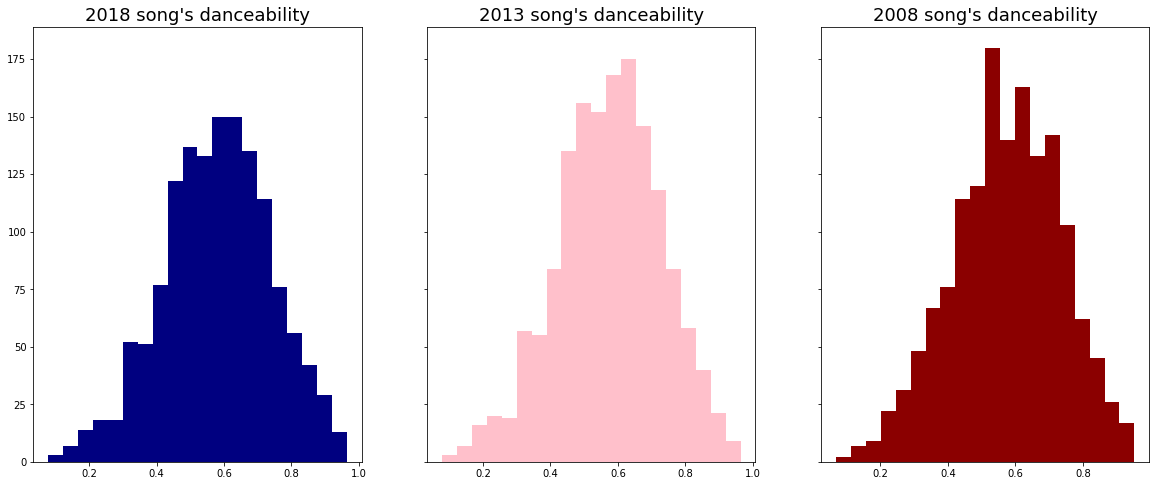

In [78]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'danceability')

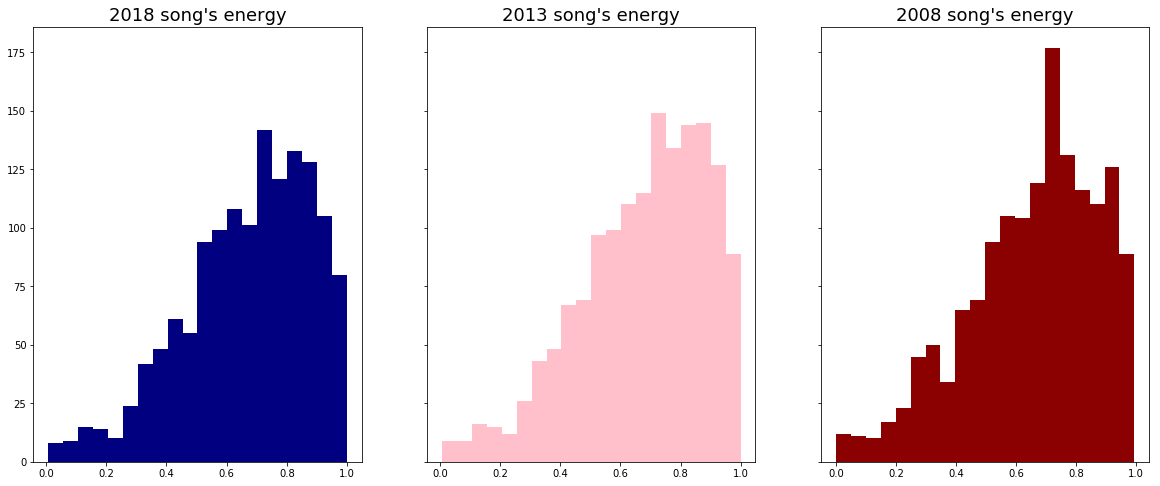

In [79]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'energy')

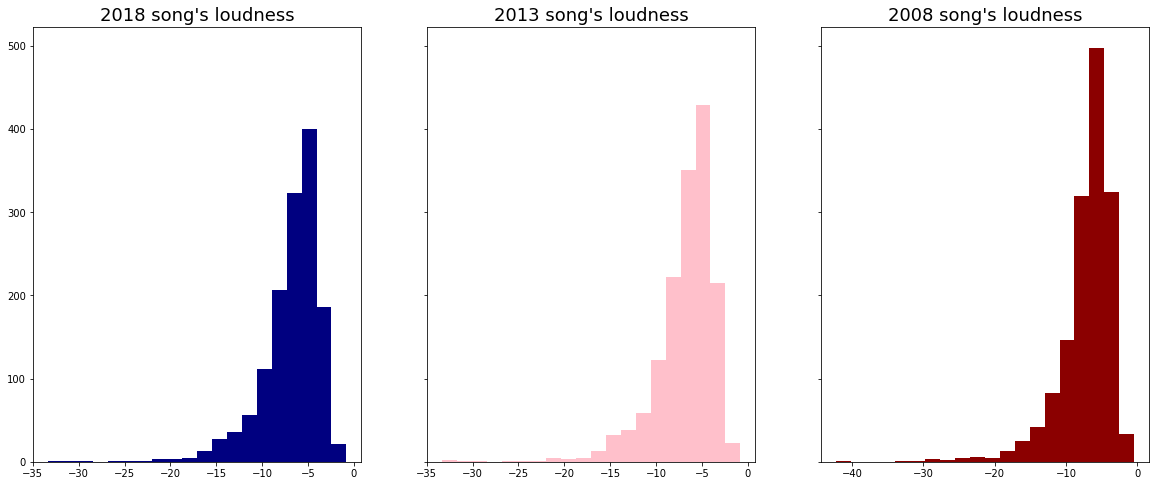

In [81]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'loudness')

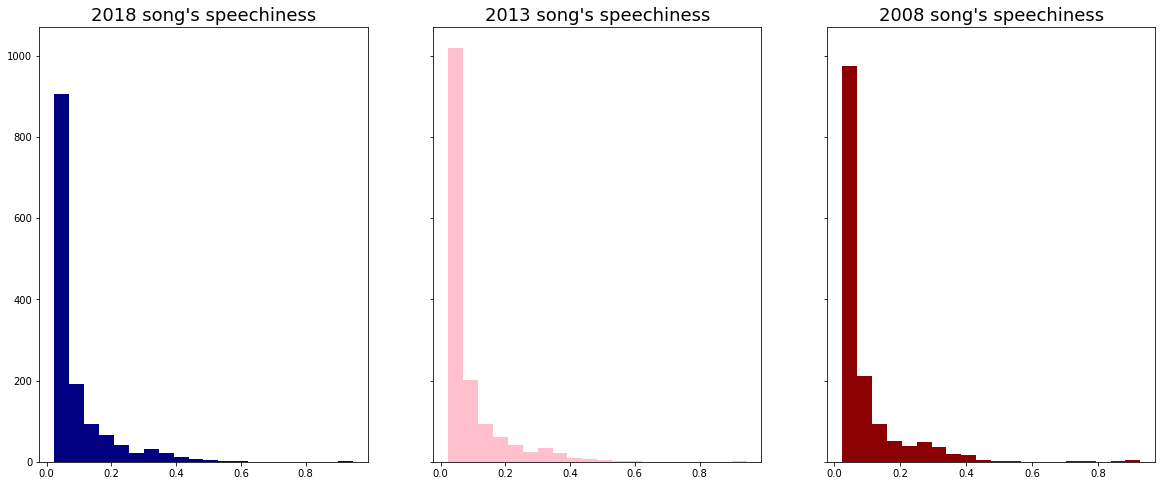

In [83]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'speechiness')

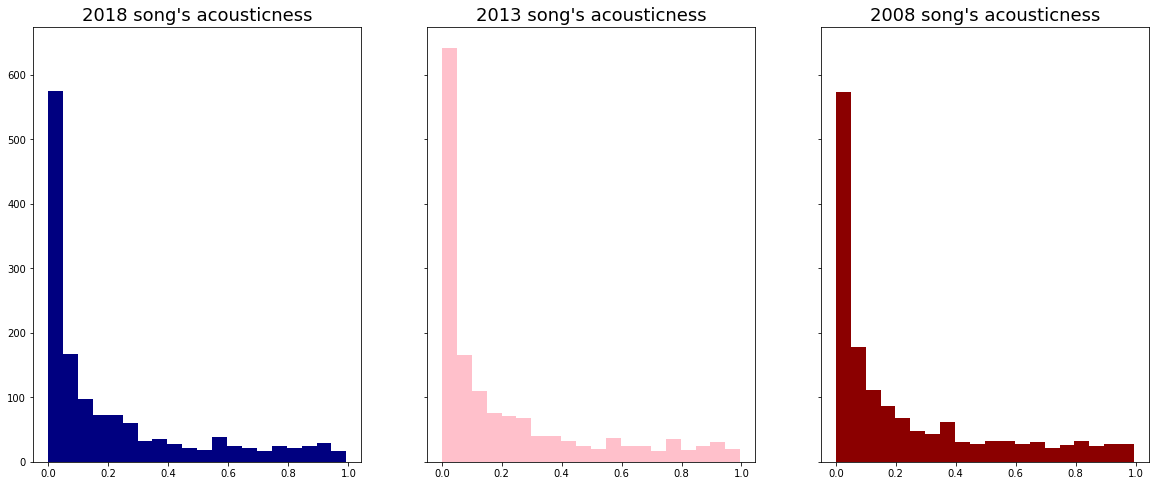

In [84]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'acousticness')

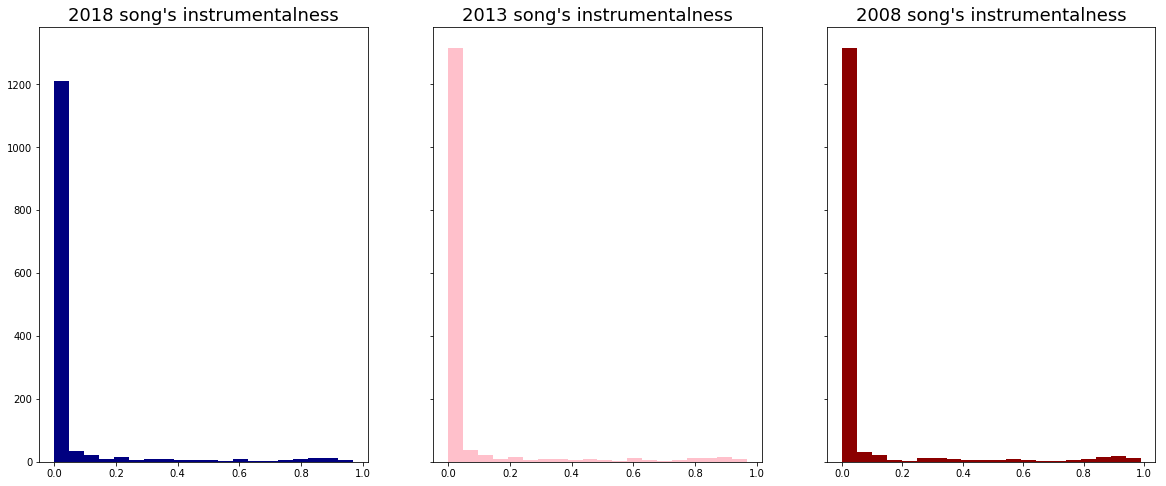

In [85]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'instrumentalness')

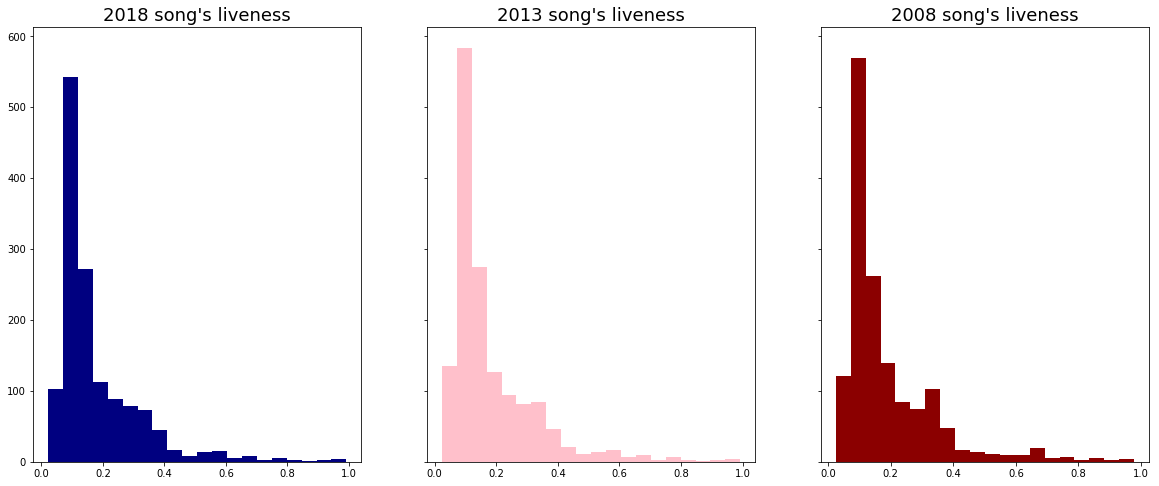

In [86]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'liveness')

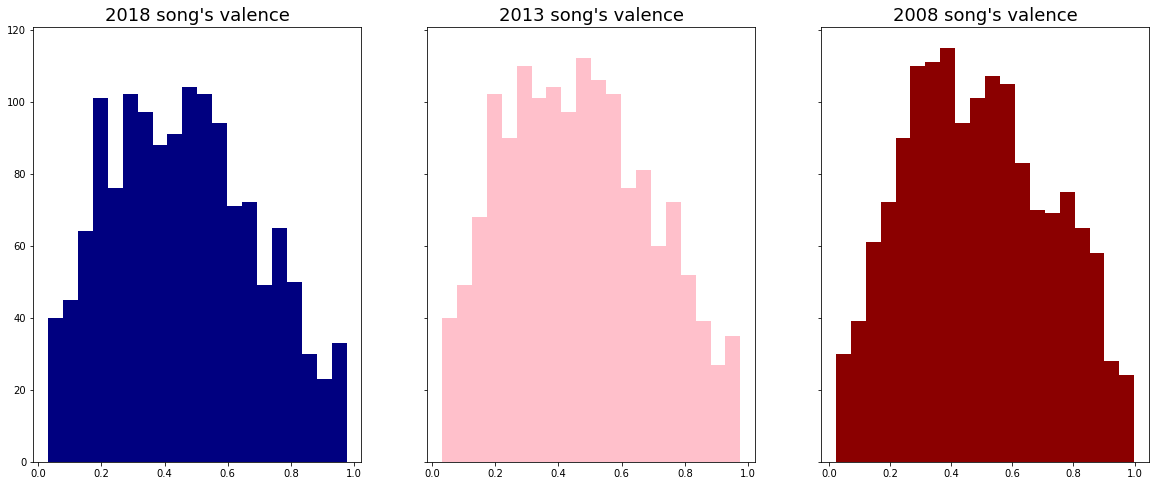

In [87]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'valence')

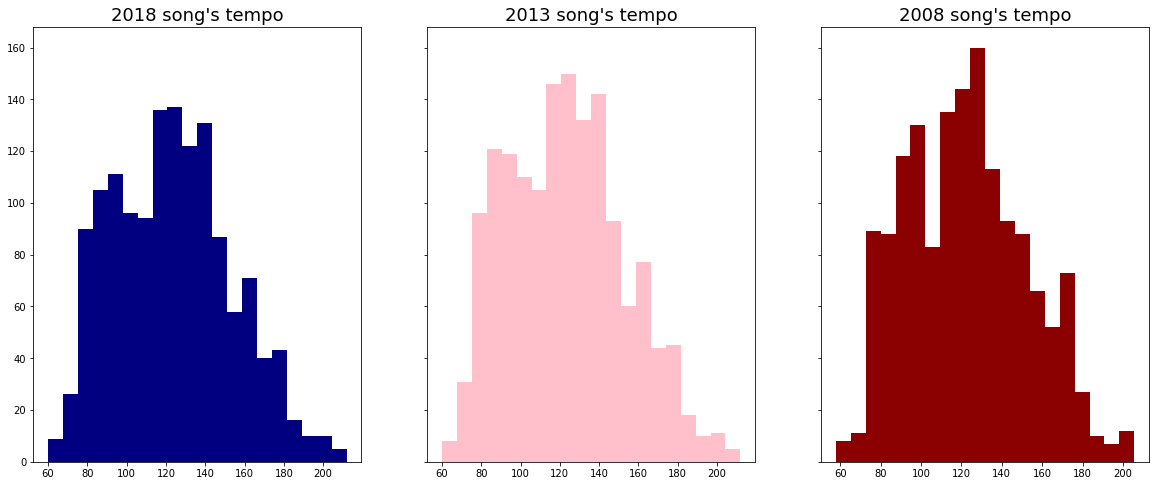

In [88]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'tempo')

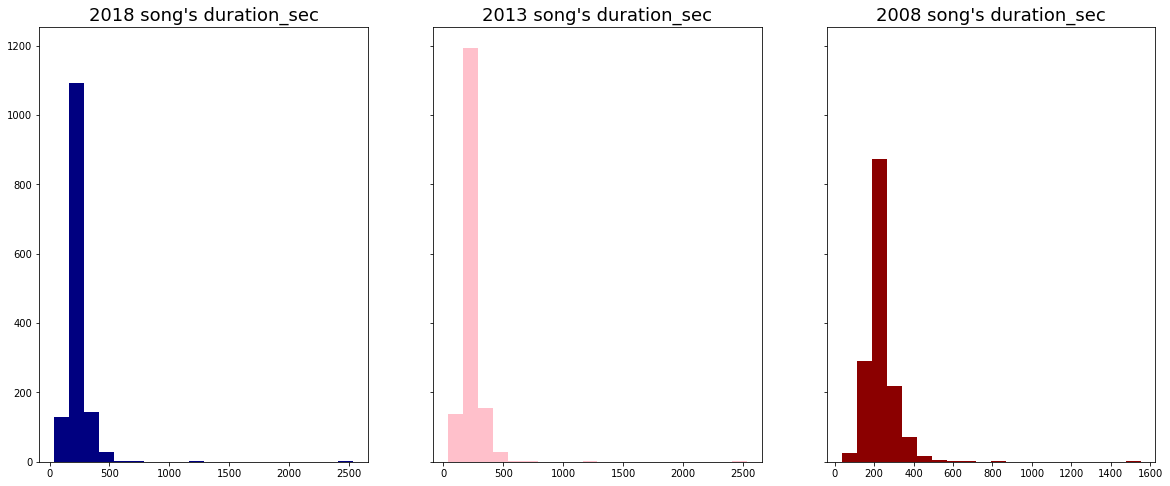

In [90]:
histograms(df1 = master_18_ft, 
           df2 = master_13_ft,
           df3 = master_08_ft,
           column = 'duration_sec')